<a href="https://colab.research.google.com/github/AlyssonBatista/processamento-de-imagens-medicas/blob/main/Atividade7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imagens 

## importando imagens

In [503]:
!wget -O 'imagem1.jpg' 'https://live.staticflickr.com/65535/52448668516_abf5f458eb_o.jpg'

--2022-11-13 05:20:52--  https://live.staticflickr.com/65535/52448668516_abf5f458eb_o.jpg
Resolving live.staticflickr.com (live.staticflickr.com)... 13.32.201.87, 2600:9000:2015:9e00:0:5a51:64c9:c681, 2600:9000:2015:bc00:0:5a51:64c9:c681, ...
Connecting to live.staticflickr.com (live.staticflickr.com)|13.32.201.87|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 52469 (51K) [image/jpeg]
Saving to: ‘imagem1.jpg’

imagem1.jpg         100%[===================>]  51.24K  --.-KB/s    in 0.001s  

2022-11-13 05:20:52 (43.3 MB/s) - ‘imagem1.jpg’ saved [52469/52469]



In [504]:
!wget -O 'imagem2.png' 'https://live.staticflickr.com/65535/52448939574_c370f09dde_o.png'

--2022-11-13 05:20:52--  https://live.staticflickr.com/65535/52448939574_c370f09dde_o.png
Resolving live.staticflickr.com (live.staticflickr.com)... 13.32.201.87, 2600:9000:2015:9e00:0:5a51:64c9:c681, 2600:9000:2015:bc00:0:5a51:64c9:c681, ...
Connecting to live.staticflickr.com (live.staticflickr.com)|13.32.201.87|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 143365 (140K) [image/png]
Saving to: ‘imagem2.png’

imagem2.png         100%[===================>] 140.00K  --.-KB/s    in 0.004s  

2022-11-13 05:20:52 (38.7 MB/s) - ‘imagem2.png’ saved [143365/143365]



## Carregando imagem 1 e imagem 2

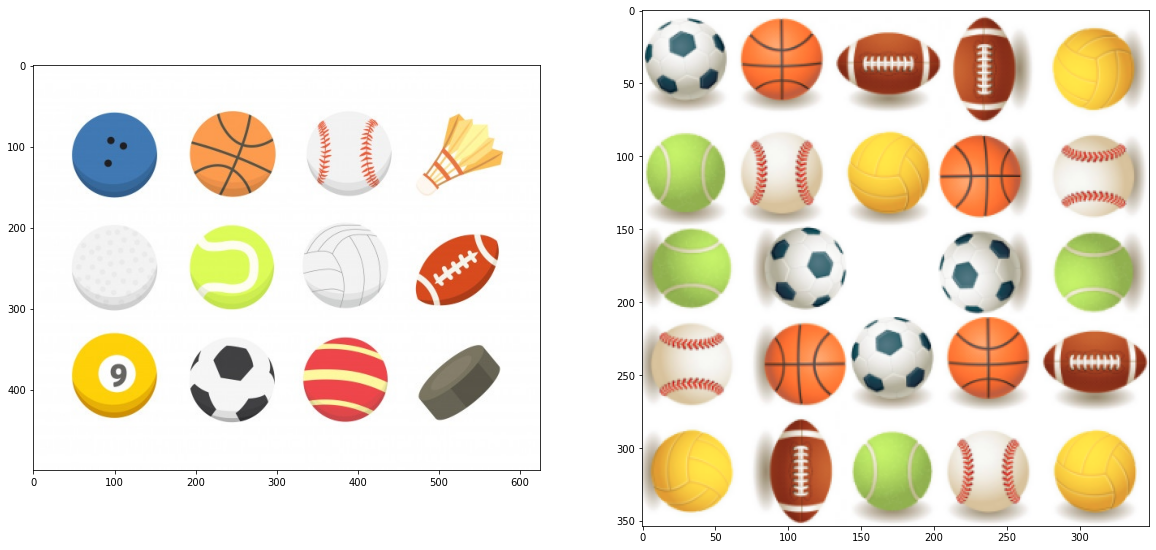

In [505]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow 
from skimage.filters import (threshold_otsu, threshold_triangle, threshold_niblack, threshold_sauvola)
from skimage import img_as_ubyte

img1 = cv2.imread('imagem1.jpg')
img2 = cv2.imread('imagem2.png')
imagem_BGR1 = cv2.cvtColor(img1, cv2.COLOR_RGB2BGR)
imagem_BGR2 = cv2.cvtColor(img2, cv2.COLOR_RGB2BGR)

gray_image1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray_image2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)


fig,ax = plt.subplots(1,2, figsize=(20,12))

ax[0].imshow(imagem_BGR1)
ax[1].imshow(imagem_BGR2)
plt.show()

# Imagem 1

### Tirando o fundo branco da imagem 1

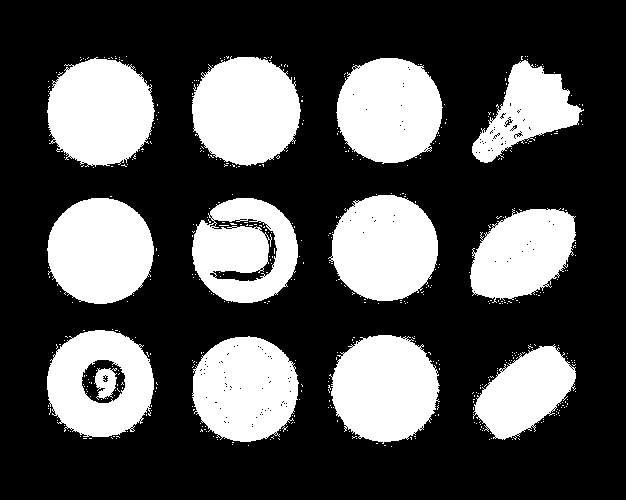

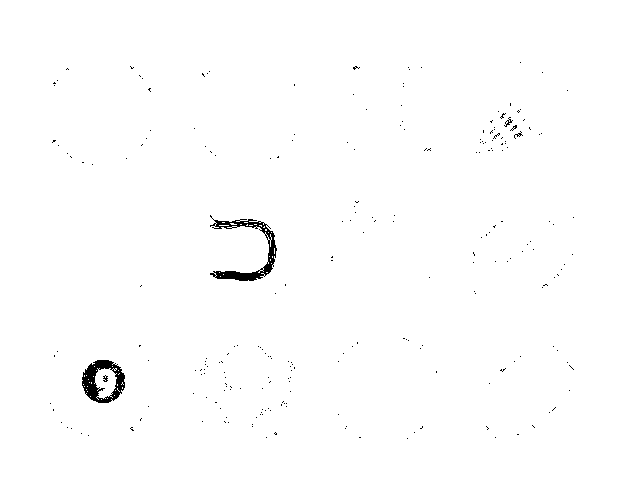

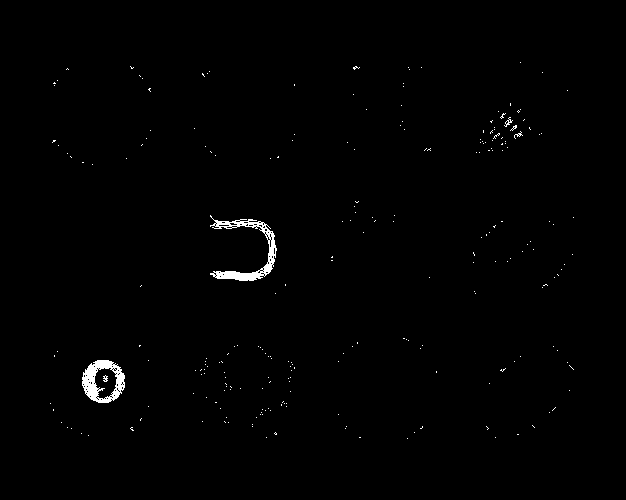

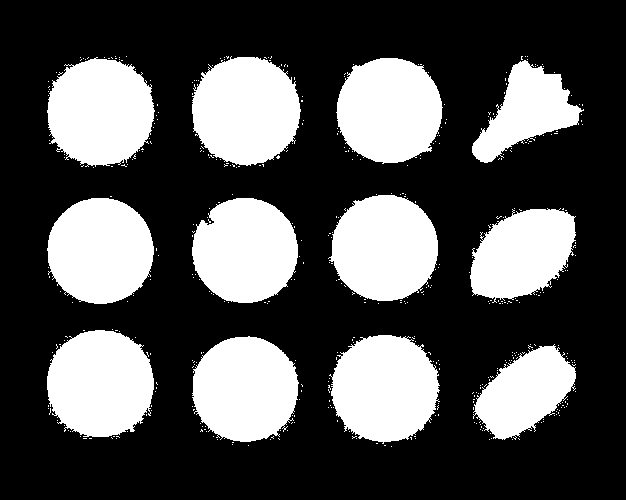

-1

In [506]:
import cv2
from google.colab.patches import cv2_imshow 
import numpy as np
 
# Read image
img1 = cv2.imread("imagem1.jpg")

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)


 
# Threshold.
# Set values equal to or above 220 to 0.
# Set values below 220 to 255.
 
th, im_th = cv2.threshold(gray, 251, 255, cv2.THRESH_BINARY_INV);
 
# Copy the thresholded image.
im_floodfill = im_th.copy()
 
# Mask used to flood filling.
# Notice the size needs to be 2 pixels than the image.
h, w = im_th.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)
 
# Floodfill from point (0, 0)
cv2.floodFill(im_floodfill, mask, (0,0), 255);
 
# Invert floodfilled image
im_floodfill_inv = cv2.bitwise_not(im_floodfill)
 
# Combine the two images to get the foreground.
im_out = im_th | im_floodfill_inv
 
# Display images.
cv2_imshow( im_th)
cv2_imshow( im_floodfill)
cv2_imshow(im_floodfill_inv)
cv2_imshow(im_out)
cv2.waitKey(0)

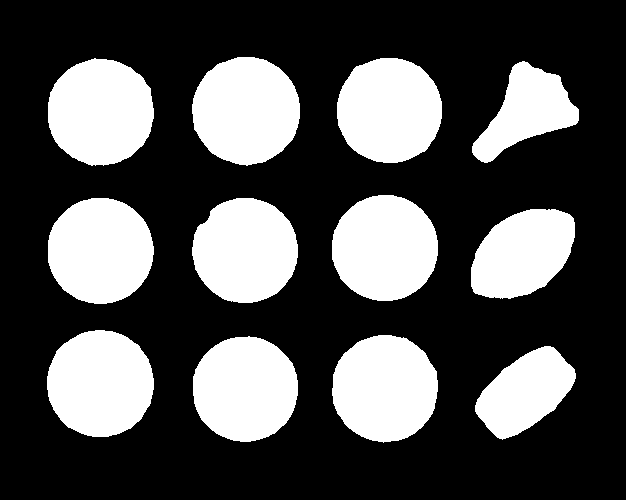

In [507]:
kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11))
mascara1 = cv2.morphologyEx(im_out, cv2.MORPH_OPEN, kernel1)

kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(25,25))
mascara2 = cv2.dilate(mascara1,kernel2,iterations=1)


kernel3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(25,25))
mascara3 = cv2.erode(mascara2,kernel2,iterations=1)

cv2_imshow(mascara3)


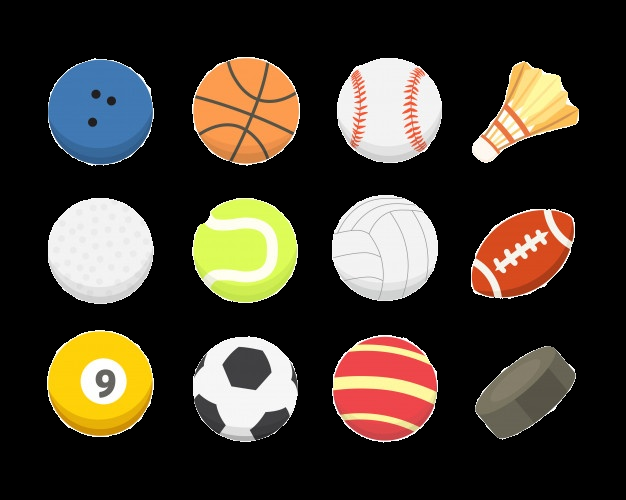

In [508]:
fun_pre = cv2.bitwise_and(img1,img1,mask=mascara3)
cv2_imshow(fun_pre)

### bola de boliche

In [509]:
hsv_azul = np.uint8([[[251,251,251]]]) #cores em BGR
hsv_azul = cv2.cvtColor(hsv_azul,cv2.COLOR_BGR2HSV)
print(hsv_azul)

[[[  0   0 251]]]


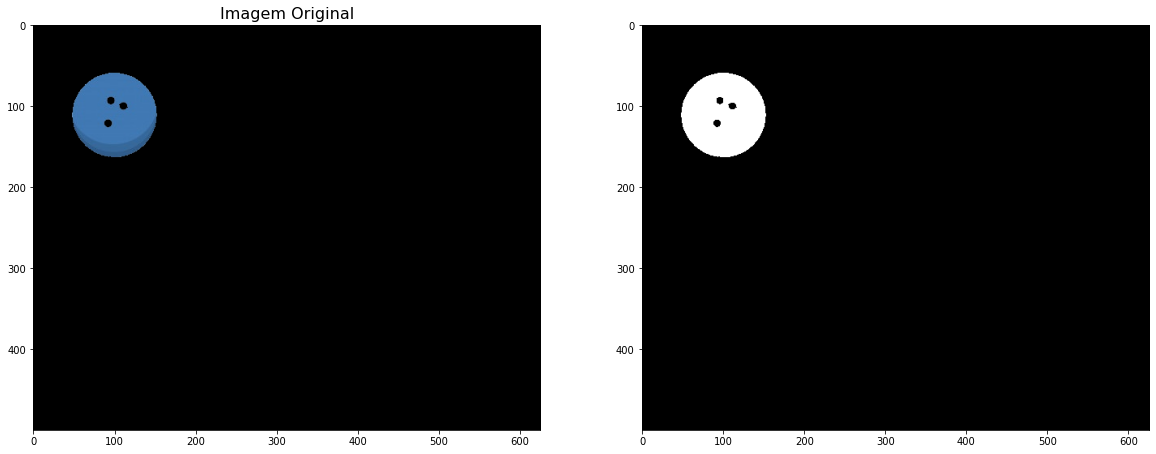

In [591]:
hsv = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)

upper= np.array([107,255,255])
lower= np.array([90,100,100])

mask6= cv2.inRange(hsv, lower, upper)
masc_azul_cla = cv2.bitwise_and(img1,img1,mask=mask6)
bola_boliche1 = cv2.cvtColor(masc_azul_cla, cv2.COLOR_BGR2RGB)

thresh_triangle = threshold_triangle(bola_boliche1)
binary_triangle = bola_boliche1 > thresh_triangle
binary_triangle = img_as_ubyte(binary_triangle)


fig, ax = plt.subplots(1,2 , figsize=(20,12)) 

ax[0].set_title('Imagem Original', fontsize=16)
ax[0].imshow(bola_boliche1)
ax[1].imshow(binary_triangle)
plt.show()



[]

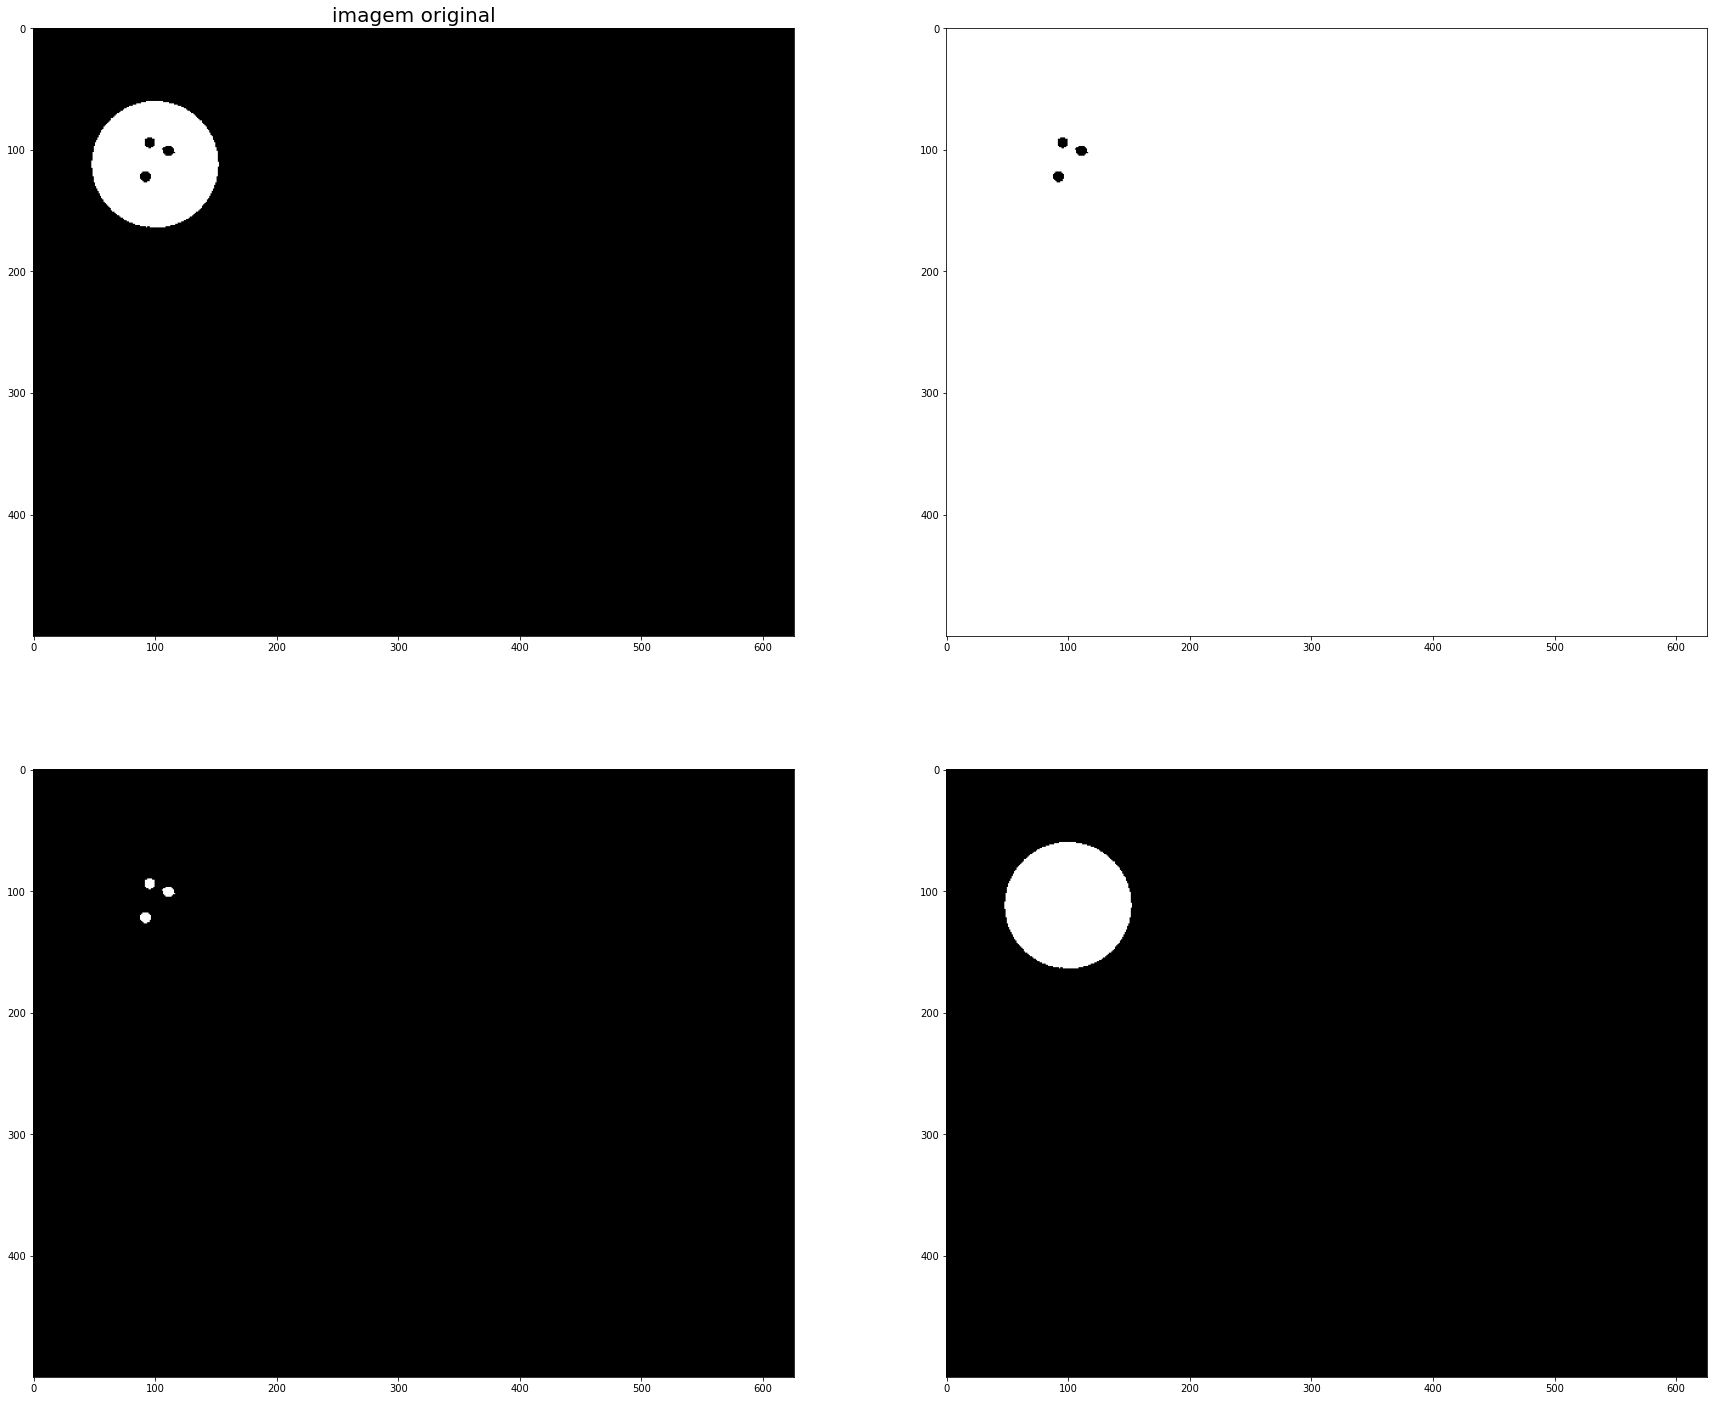

In [562]:
gray_image1 = cv2.cvtColor(bola_boliche1, cv2.COLOR_BGR2GRAY)

th, im_th = cv2.threshold(gray_image1, 0, 255, cv2.THRESH_BINARY);
 
# Copy the thresholded image.
im_floodfill = im_th.copy()
 
# Mask used to flood filling.
# Notice the size needs to be 2 pixels than the image.
h, w = im_th.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)
 
# Floodfill from point (0, 0)
cv2.floodFill(im_floodfill, mask, (0,0), 255);
 
# Invert floodfilled image
im_floodfill_inv = cv2.bitwise_not(im_floodfill)
 
# Combine the two images to get the foreground.
im_out = im_th | im_floodfill_inv
 
# Display images.
# cv2.imshow("Thresholded Image", im_th)
# cv2.imshow("Floodfilled Image", im_floodfill)
# cv2.imshow("Inverted Floodfilled Image", im_floodfill_inv)
# cv2.imshow("Foreground", im_out)
# cv2.waitKey(0)

saida = cv2.resize(im_out, img1.shape[1::-1])

fig,ax = plt.subplots(2,2,figsize=(30,25))

ax[0,0].set_title('imagem original', fontsize=20)
ax[0,0].imshow(im_th,'gray')
ax[0,1].imshow(im_floodfill,'gray')
ax[1,0].imshow(im_floodfill_inv ,'gray')
ax[1,1].imshow(saida,'gray')
plt.plot()


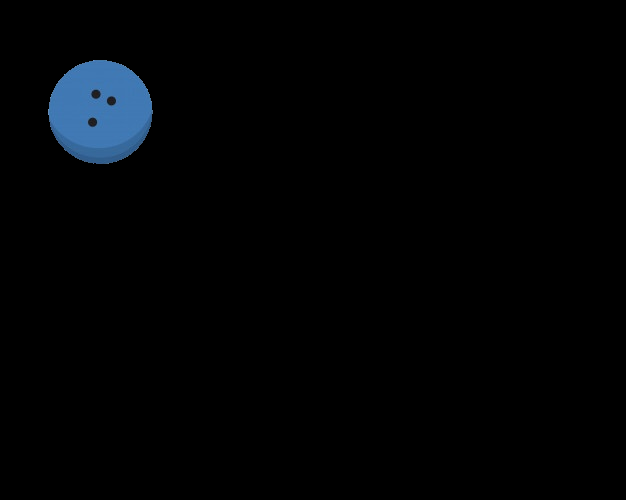

In [563]:
bola_boliche = cv2.bitwise_and(fun_pre,fun_pre,mask=saida)
cv2_imshow(bola_boliche)

### bola de sinuca

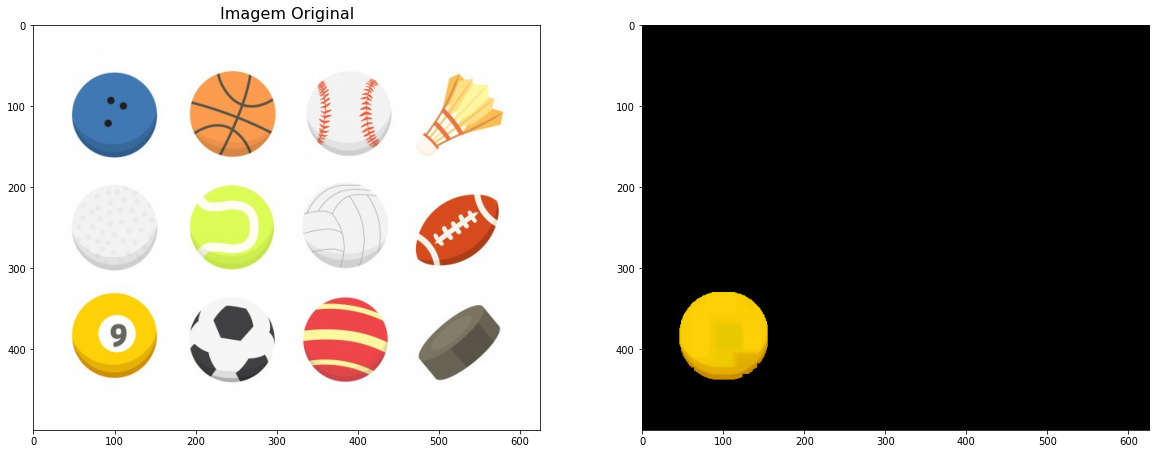

In [592]:
hsv = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)

upper= np.array([30, 255 ,255])
lower= np.array([20,100,100])

mask6= cv2.inRange(hsv, lower, upper)
masc_sinu = cv2.bitwise_and(img1,img1,mask=mask6)
bola_sinuca1 = cv2.cvtColor(masc_sinu, cv2.COLOR_BGR2RGB)

kernel1 = cv2.getStructuringElement(cv2.MORPH_RECT,(15,15))
erosao1 = cv2.erode(bola_sinuca1,kernel1,iterations = 1)

kernel2 = cv2.getStructuringElement(cv2.MORPH_RECT,(47,47))
dilation1 = cv2.dilate(erosao1,kernel2,iterations = 1)

kernel3= cv2.getStructuringElement(cv2.MORPH_RECT,(28,28))
bola_sinuca1 = cv2.erode(dilation1,kernel3,iterations = 1)

fig, ax = plt.subplots(1,2 , figsize=(20,12)) 

ax[0].set_title('Imagem Original', fontsize=16)
ax[0].imshow(imagem_BGR1)
ax[1].imshow(bola_sinuca1)
plt.show()

[]

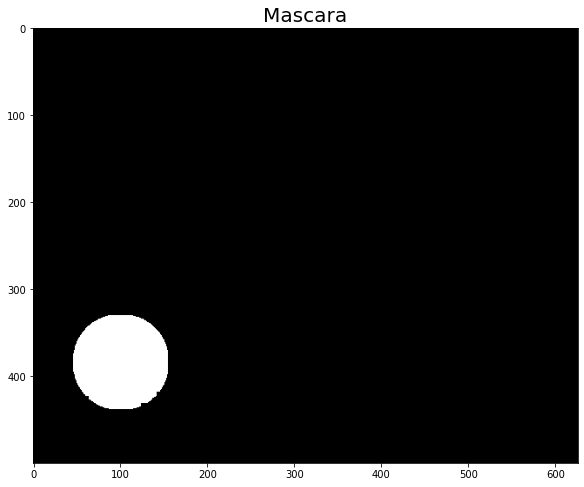

In [514]:
gray_image1 = cv2.cvtColor(bola_sinuca1, cv2.COLOR_BGR2GRAY)

th, saida = cv2.threshold(gray_image1, 0, 255, cv2.THRESH_BINARY);

fig,ax = plt.subplots(figsize=(17,8))

ax.set_title('Mascara', fontsize=20)
plt.imshow(saida,'gray')
plt.plot()


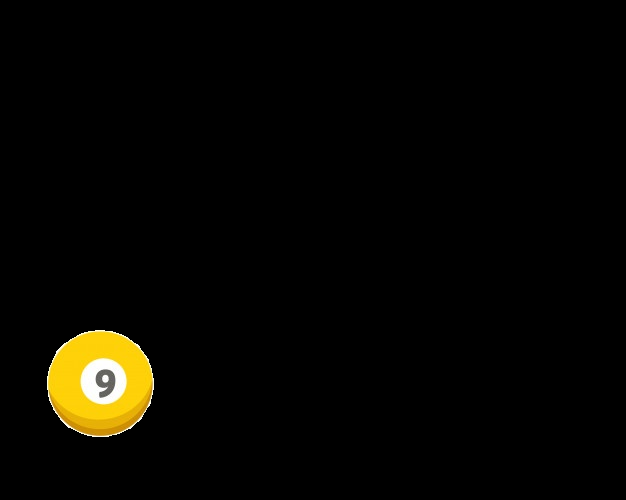

In [515]:
bola_sinuca = cv2.bitwise_and(fun_pre,fun_pre,mask=saida)
cv2_imshow(bola_sinuca)

### bola de basquete

In [516]:
hsv_azul = np.uint8([[[79,156,252]]]) #cores em BGR
hsv_azul = cv2.cvtColor(hsv_azul,cv2.COLOR_BGR2HSV)
print(hsv_azul)

[[[ 13 175 252]]]


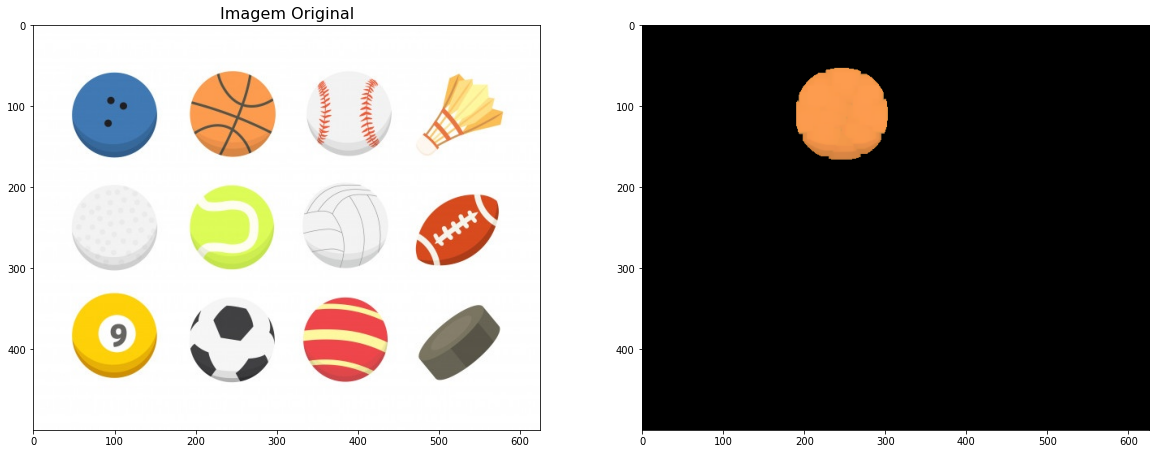

In [593]:
hsv = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)

upper = np.array([16,255,255])
lower = np.array([12,100,100])

mask6= cv2.inRange(hsv, lower, upper)
masc = cv2.bitwise_and(img1,img1,mask=mask6)
bola_basquete1 = cv2.cvtColor(masc, cv2.COLOR_BGR2RGB)

kernel1 = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
erosao1 = cv2.erode(bola_basquete1,kernel1,iterations = 1)

kernel2 = cv2.getStructuringElement(cv2.MORPH_RECT,(13,13))
bola_basquete2 = cv2.dilate(erosao1,kernel2,iterations = 1)



fig, ax = plt.subplots(1,2 , figsize=(20,12)) 

ax[0].set_title('Imagem Original', fontsize=16)
ax[0].imshow(imagem_BGR1)
ax[1].imshow(bola_basquete2)
plt.show()


[]

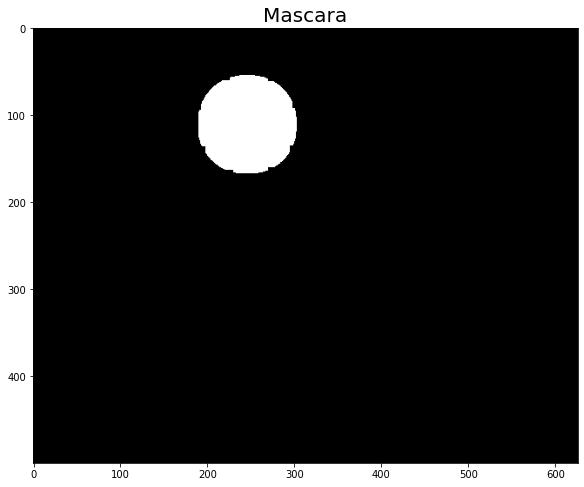

In [518]:
gray_image1 = cv2.cvtColor(bola_basquete2, cv2.COLOR_BGR2GRAY)

th, saida = cv2.threshold(gray_image1, 0, 255, cv2.THRESH_BINARY);

fig,ax = plt.subplots(figsize=(17,8))

ax.set_title('Mascara', fontsize=20)
plt.imshow(saida,'gray')
plt.plot()


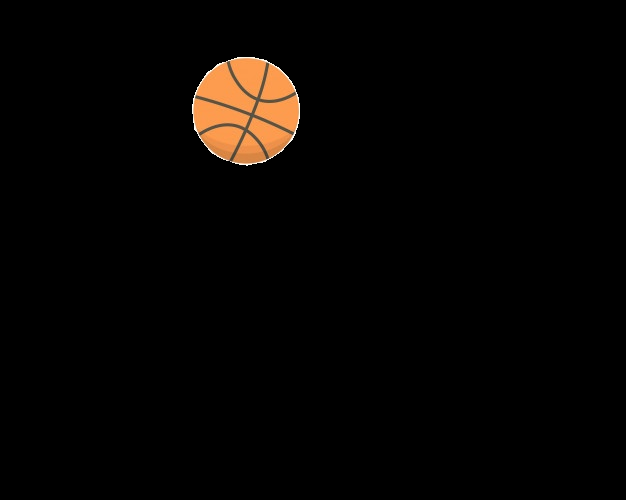

In [519]:
bola_basquete = cv2.bitwise_and(fun_pre,fun_pre,mask=saida)
cv2_imshow(bola_basquete)

### Bola de futebol americano

In [520]:
hsv_azul = np.uint8([[[232,244,244]]]) #cores em BGR
hsv_azul = cv2.cvtColor(hsv_azul,cv2.COLOR_BGR2HSV)
print(hsv_azul)

[[[ 30  13 244]]]


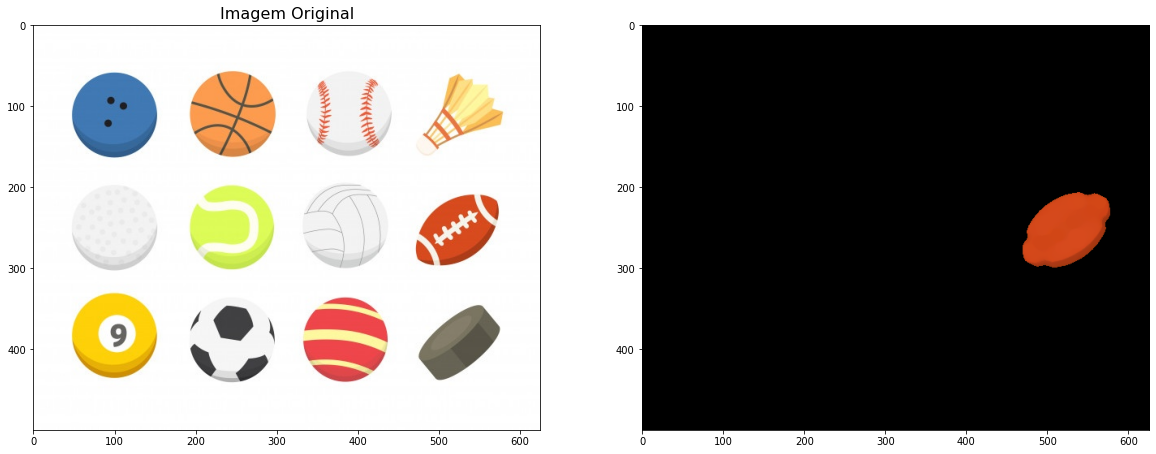

In [594]:
hsv = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)

upper = np.array([9,255,255])
lower = np.array([2,100,100])

mask6= cv2.inRange(hsv, lower, upper)
masc = cv2.bitwise_and(img1,img1,mask=mask6)
bola_famericano1 = cv2.cvtColor(masc, cv2.COLOR_BGR2RGB)

kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(9,9))
erosao = cv2.erode(bola_famericano1,kernel1,iterations=1)

kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(29,29))
erosao2 = cv2.dilate(erosao,kernel2,iterations=1)

kernel3= cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(15,15))
erosao3 = cv2.erode(erosao2,kernel3,iterations=1)

fig, ax = plt.subplots(1,2 , figsize=(20,12)) 

ax[0].set_title('Imagem Original', fontsize=16)
ax[0].imshow(imagem_BGR1)
ax[1].imshow(erosao3)
plt.show()

[]

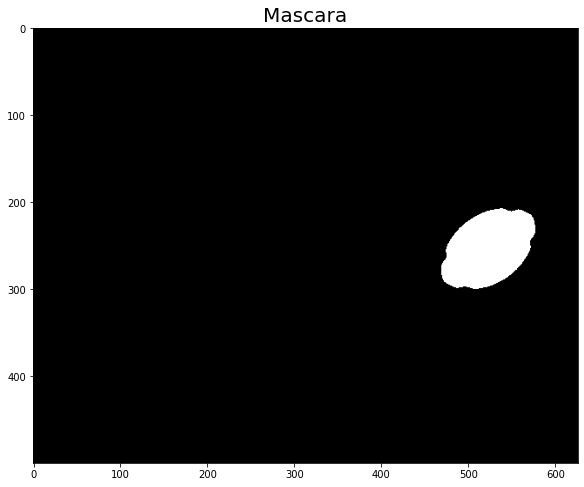

In [577]:
gray_image1 = cv2.cvtColor(erosao3, cv2.COLOR_BGR2GRAY)

th, saida = cv2.threshold(gray_image1, 0, 255, cv2.THRESH_BINARY);

fig,ax = plt.subplots(figsize=(17,8))

ax.set_title('Mascara', fontsize=20)
plt.imshow(saida,'gray')
plt.plot()


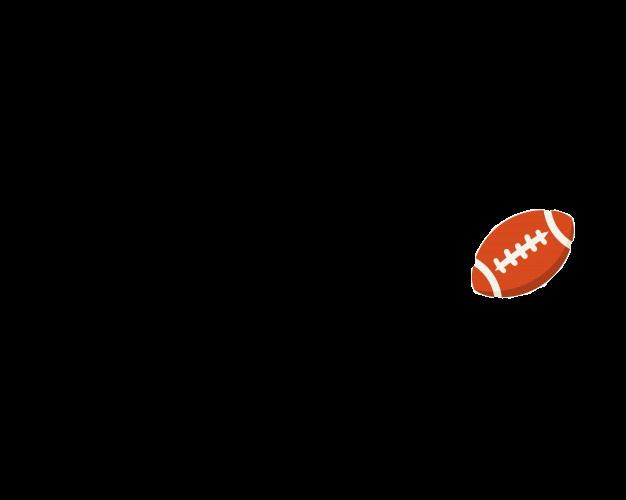

In [579]:
bola_famericano = cv2.bitwise_and(fun_pre,fun_pre,mask=saida)
cv2_imshow(bola_famericano)

### bola de gude

In [525]:
hsv_azul = np.uint8([[[72,70,224]]]) #cores em BGR
hsv_azul = cv2.cvtColor(hsv_azul,cv2.COLOR_BGR2HSV)
print(hsv_azul)

[[[  0 175 224]]]


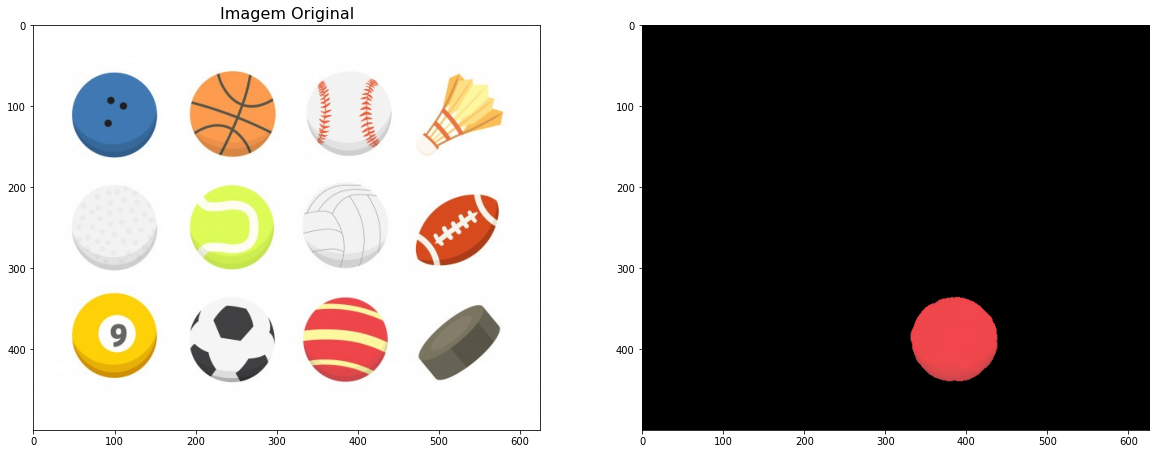

In [595]:
hsv = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)

upper = np.array([179,255,255])
lower = np.array([161,100,100])

mask6= cv2.inRange(hsv, lower, upper)
masc = cv2.bitwise_and(img1,img1,mask=mask6)
bola_gude1= cv2.cvtColor(masc, cv2.COLOR_BGR2RGB)

upper = np.array([29,255,255])
lower = np.array([27,0,0])

mask6= cv2.inRange(hsv, lower, upper)
masc = cv2.bitwise_and(img1,img1,mask=mask6)
bola_gude2 = cv2.cvtColor(masc, cv2.COLOR_BGR2RGB)

bola_gude3 = (bola_gude1 + bola_gude2)

kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(9,9))
erode23 = cv2.dilate(bola_gude3,kernel1,iterations=1)

kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(33,33))
erodefi = cv2.erode(erode23,kernel2,iterations=1)

kernel3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(27,27))
dilataf = cv2.dilate(erodefi,kernel3,iterations=1)
 

fig, ax = plt.subplots(1,2 , figsize=(20,12)) 

ax[0].set_title('Imagem Original', fontsize=16)
ax[0].imshow(imagem_BGR1)
ax[1].imshow(dilataf)
plt.show()

[]

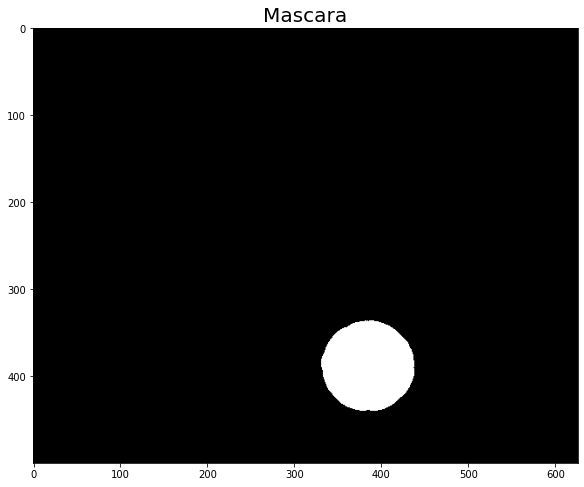

In [527]:
gray_image1 = cv2.cvtColor(dilataf, cv2.COLOR_BGR2GRAY)

th, saida = cv2.threshold(gray_image1, 0, 255, cv2.THRESH_BINARY);

fig,ax = plt.subplots(figsize=(17,8))

ax.set_title('Mascara', fontsize=20)
plt.imshow(saida,'gray')
plt.plot()


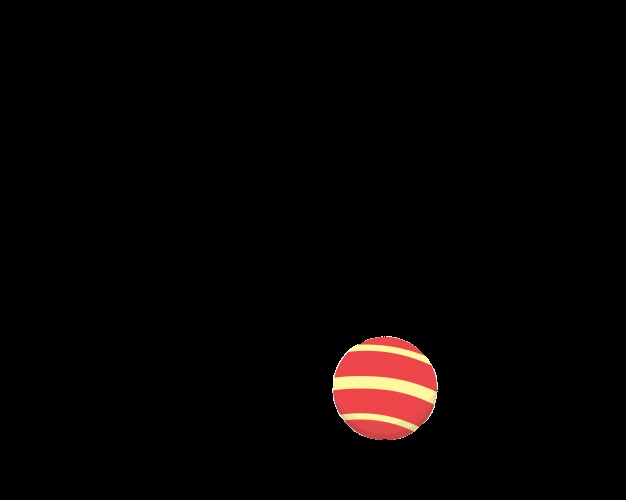

In [528]:
bola_gude = cv2.bitwise_and(fun_pre,fun_pre,mask=saida)
cv2_imshow(bola_gude)

### bola de têniz

In [529]:
hsv_azul = np.uint8([[[85,252,219]]]) #cores em BGR
hsv_azul = cv2.cvtColor(hsv_azul,cv2.COLOR_BGR2HSV)
print(hsv_azul)

[[[ 36 169 252]]]


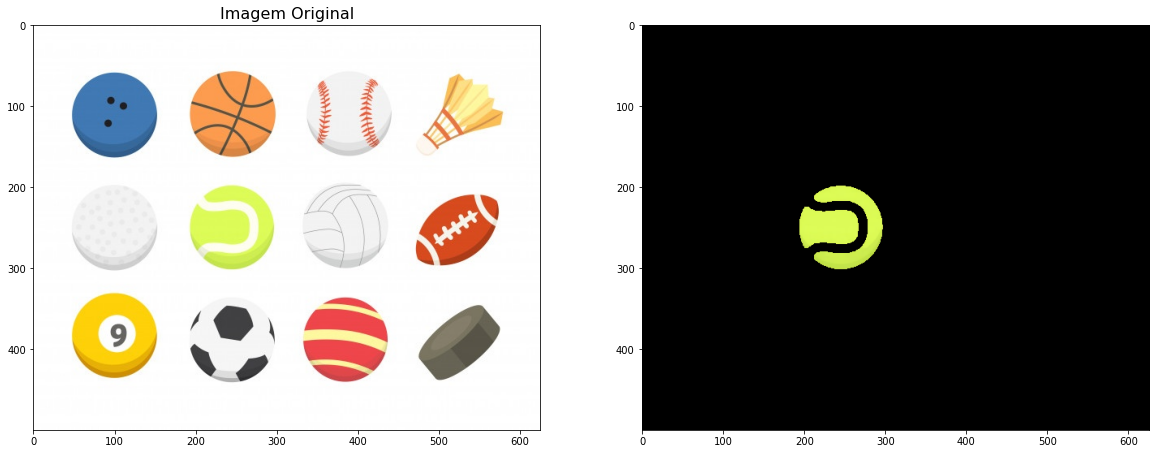

In [596]:
hsv = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)

upper = np.array([46,255,255])
lower = np.array([30,100,100])

mask6= cv2.inRange(hsv, lower, upper)
masc = cv2.bitwise_and(img1,img1,mask=mask6)
bola_tenis1 = cv2.cvtColor(masc, cv2.COLOR_BGR2RGB)

kernel1 = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
abertura1 = cv2.morphologyEx(bola_tenis1, cv2.MORPH_OPEN, kernel1)


fig, ax = plt.subplots(1,2 , figsize=(20,12)) 

ax[0].set_title('Imagem Original', fontsize=16)
ax[0].imshow(imagem_BGR1)
ax[1].imshow(abertura1)
plt.show()

[]

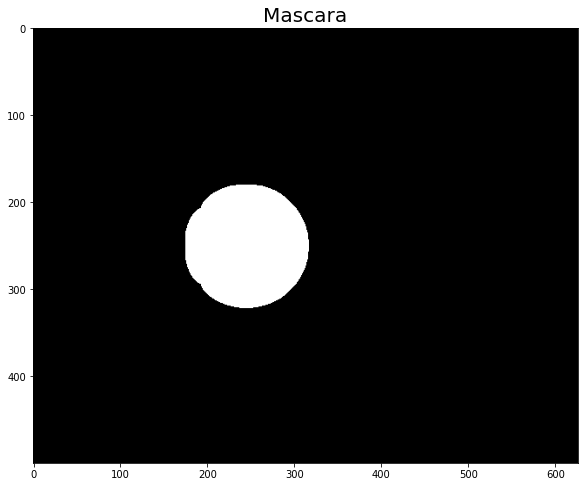

In [531]:
gray_image1 = cv2.cvtColor(abertura1, cv2.COLOR_BGR2GRAY)

th, im_th = cv2.threshold(gray_image1, 0, 255, cv2.THRESH_BINARY);

kernel3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(40,40))
dilatafi = cv2.dilate(im_th,kernel3,iterations=1)

fig,ax = plt.subplots(figsize=(17,8))

ax.set_title('Mascara', fontsize=20)
plt.imshow(dilatafi,'gray')
plt.plot()


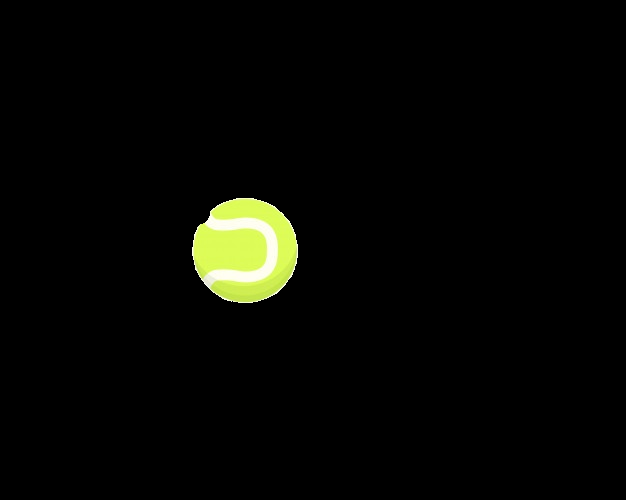

In [532]:
bola_tenis = cv2.bitwise_and(fun_pre,fun_pre,mask=dilatafi)
cv2_imshow(bola_tenis)

### bola de golf

In [533]:
hsv_azul = np.uint8([[[242,242,242]]]) #cores em BGR
hsv_azul = cv2.cvtColor(hsv_azul,cv2.COLOR_BGR2HSV)
print(hsv_azul)

[[[  0   0 242]]]


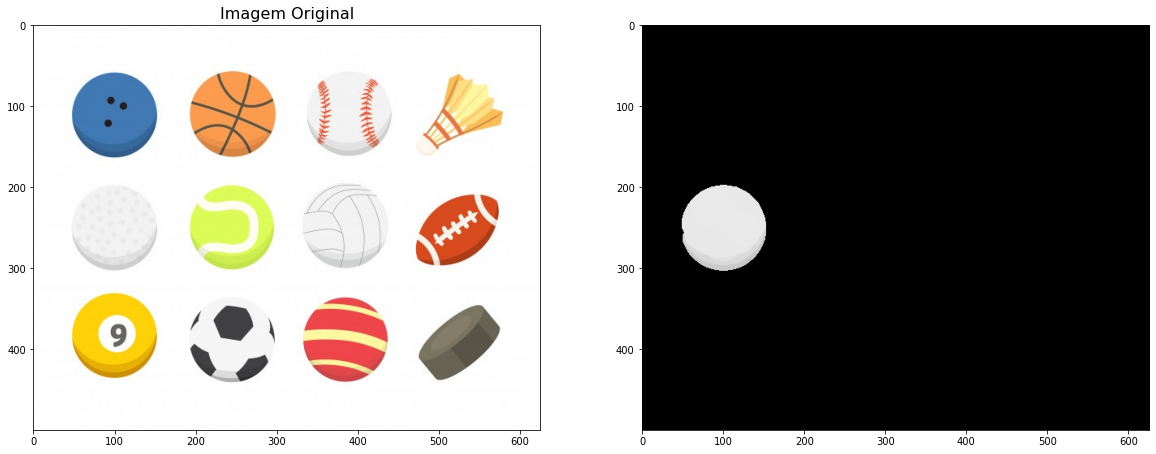

In [597]:
hsv = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)

upper = np.array([0,0,246])
lower = np.array([0,0,0])

mask6= cv2.inRange(hsv, lower, upper)
masc = cv2.bitwise_and(img1,img1,mask=mask6)
bola_golfe1 = cv2.cvtColor(masc, cv2.COLOR_BGR2RGB)

kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(35,35))
abertura1 = cv2.morphologyEx(bola_golfe1, cv2.MORPH_OPEN, kernel1)


fig, ax = plt.subplots(1,2 , figsize=(20,12)) 

ax[0].set_title('Imagem Original', fontsize=16)
ax[0].imshow(imagem_BGR1)
ax[1].imshow(abertura1)
plt.show()

[]

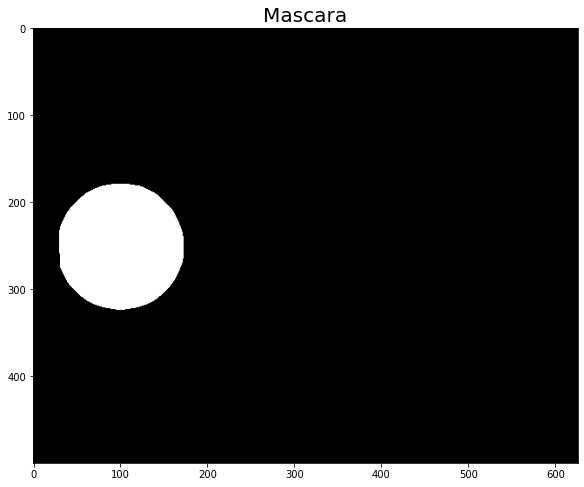

In [535]:
gray_image1 = cv2.cvtColor(abertura1, cv2.COLOR_BGR2GRAY)

th, im_th = cv2.threshold(gray_image1, 0, 255, cv2.THRESH_BINARY);

kernel3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(40,40))
dilatafi = cv2.dilate(im_th,kernel3,iterations=1)

fig,ax = plt.subplots(figsize=(17,8))

ax.set_title('Mascara', fontsize=20)
plt.imshow(dilatafi,'gray')
plt.plot()


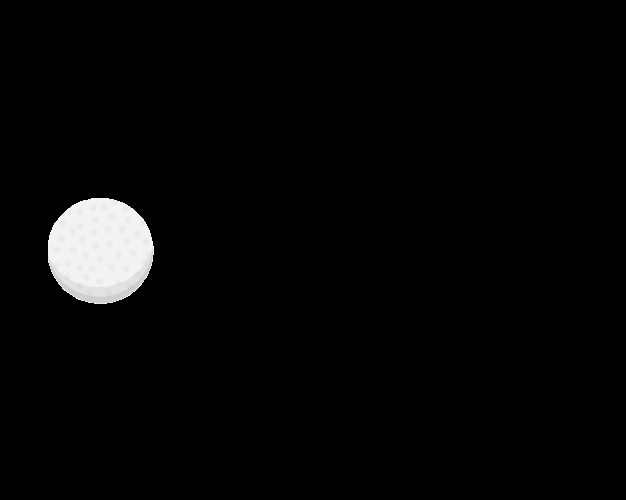

In [536]:
bola_golfe = cv2.bitwise_and(fun_pre,fun_pre,mask=dilatafi)
cv2_imshow(bola_golfe)

### Bola de volei

In [537]:
hsv_azul = np.uint8([[[242,242,242]]]) #cores em BGR
hsv_azul = cv2.cvtColor(hsv_azul,cv2.COLOR_BGR2HSV)
print(hsv_azul)

[[[  0   0 242]]]


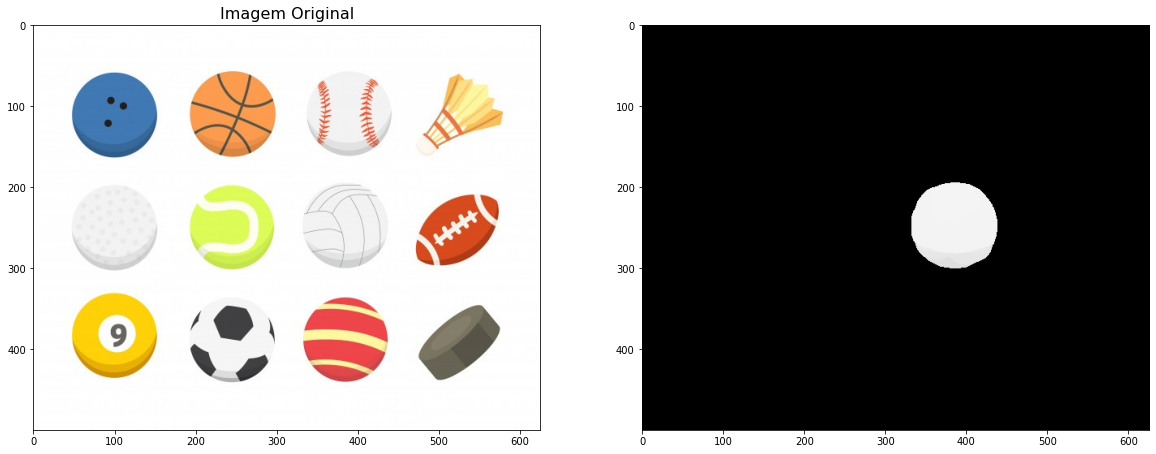

In [598]:
hsv = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)

upper = np.array([0,0,250])
lower = np.array([0,0,0])

mask6= cv2.inRange(hsv, lower, upper)
masc = cv2.bitwise_and(img1,img1,mask=mask6)
bola_volei1 = cv2.cvtColor(masc, cv2.COLOR_BGR2RGB)

imagem = bola_volei1 - bola_golfe

kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(13,13))
abertura1 = cv2.morphologyEx(imagem, cv2.MORPH_CLOSE, kernel1)

kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(45,45))
erode = cv2.erode(abertura1,kernel2,iterations=1)

kernel3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(45,45))
dilata = cv2.dilate(erode,kernel3,iterations=1)


fig, ax = plt.subplots(1,2 , figsize=(20,12)) 

ax[0].set_title('Imagem Original', fontsize=16)
ax[0].imshow(imagem_BGR1)
ax[1].imshow(dilata)
plt.show()

[]

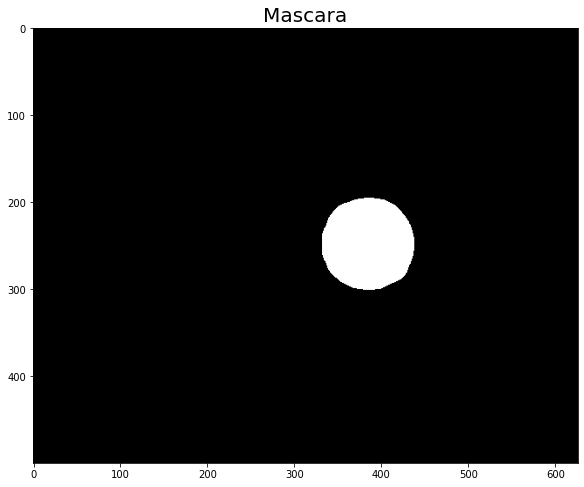

In [539]:
gray_image = cv2.cvtColor(dilata,cv2.COLOR_BGR2GRAY)

T,saida = cv2.threshold(gray_image,0,255,cv2.THRESH_BINARY)

fig,ax=plt.subplots(figsize=(17,8))

ax.set_title('Mascara',fontsize=20)
plt.imshow(saida,'gray')
plt.plot()

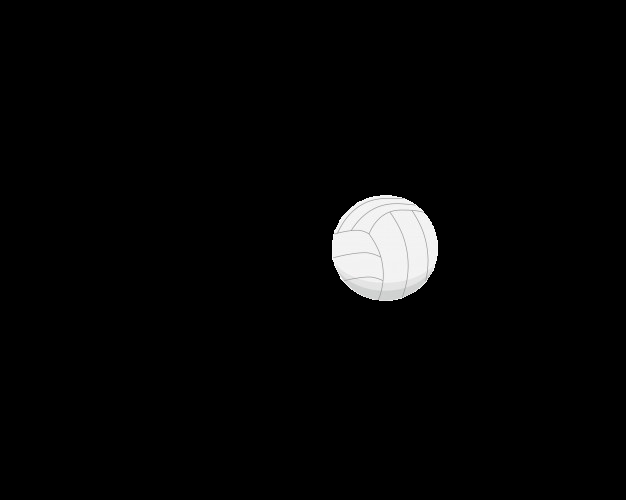

In [540]:
bola_volei = cv2.bitwise_and(fun_pre,fun_pre,mask=saida)
cv2_imshow(bola_volei)

### Bola de futebol

In [541]:
hsv_azul = np.uint8([[[218,115,91]]]) #cores em BGR
hsv_azul = cv2.cvtColor(hsv_azul,cv2.COLOR_BGR2HSV)
print(hsv_azul)

[[[114 149 218]]]


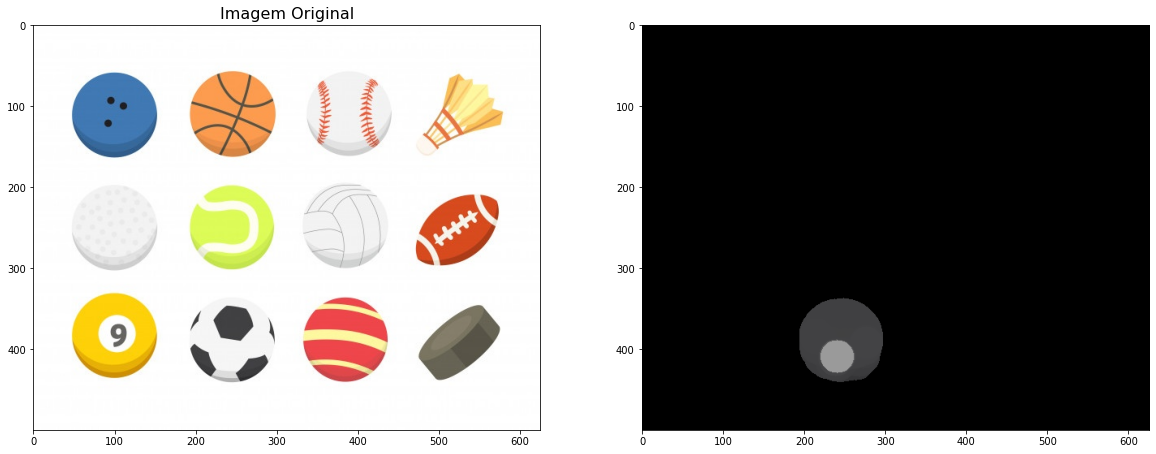

In [599]:
hsv = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)

up = np.array([0,5,251])
low = np.array([0,0,0])

mask6= cv2.inRange(hsv, low, up)
masc_b = cv2.bitwise_and(img1,img1,mask=mask6)
bola_futebol1 = cv2.cvtColor(masc_b, cv2.COLOR_BGR2RGB)

up = np.array([179,255,255])
low = np.array([110,0,0])

mask6= cv2.inRange(hsv, low, up)
masc_b = cv2.bitwise_and(img1,img1,mask=mask6)
bola_futebol2 = cv2.cvtColor(masc_b, cv2.COLOR_BGR2RGB)

futi = (bola_futebol1 + bola_futebol2) - (bola_golfe + bola_volei)


kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
dilata_futi = cv2.dilate(futi,kernel1,iterations=1)


kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(47,47))
erode_futi = cv2.erode(dilata_futi,kernel2,iterations=1)


kernel3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(41,41))
dilata_futi1 = cv2.dilate(erode_futi,kernel3,iterations=1)

fig, ax = plt.subplots(1,2 , figsize=(20,12)) 

ax[0].set_title('Imagem Original', fontsize=16)
ax[0].imshow(imagem_BGR1)
ax[1].imshow(dilata_futi1)
plt.show()

[]

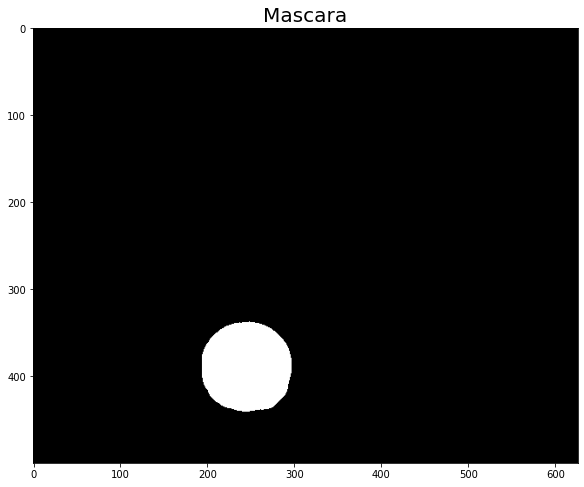

In [543]:
gray_image = cv2.cvtColor(dilata_futi1,cv2.COLOR_BGR2GRAY)

T,saida = cv2.threshold(gray_image,0,255,cv2.THRESH_BINARY)

fig,ax=plt.subplots(figsize=(17,8))

ax.set_title('Mascara',fontsize=20)
plt.imshow(saida,'gray')
plt.plot()

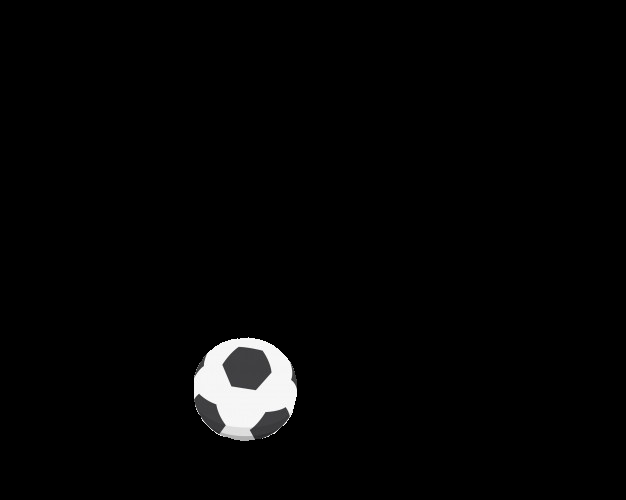

In [544]:
bola_futebol = cv2.bitwise_and(fun_pre,fun_pre,mask=saida) 
cv2_imshow(bola_futebol)

### Disco de hóquei

In [545]:
hsv_azul = np.uint8([[[133,126,107]]]) #cores em BGR
hsv_azul = cv2.cvtColor(hsv_azul,cv2.COLOR_BGR2HSV)
print(hsv_azul)

[[[ 98  50 133]]]


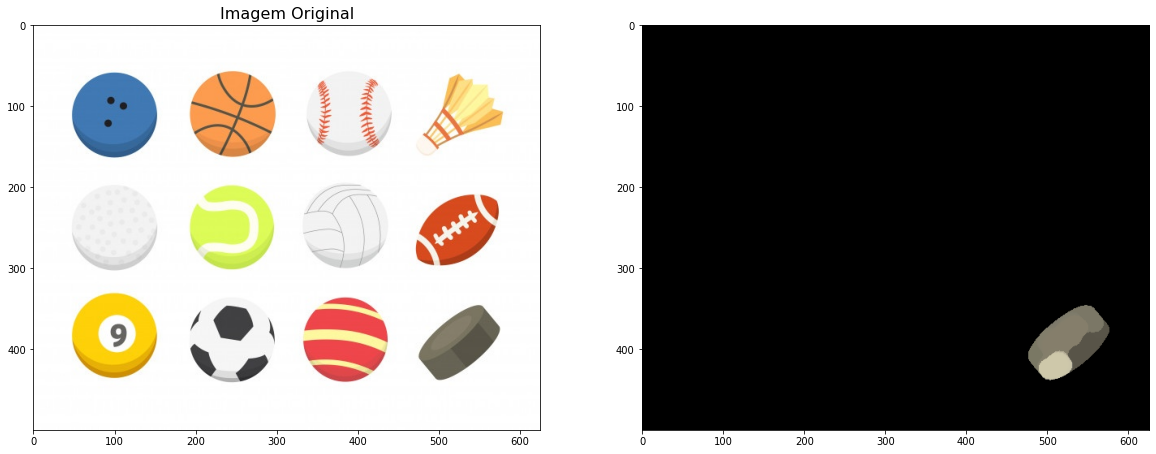

In [600]:
hsv = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)

upper = np.array([95,45,103])
lower = np.array([0,0,0])

mask6= cv2.inRange(hsv, lower, upper)
masc_b = cv2.bitwise_and(img1,img1,mask=mask6)
disco_hoquei1 = cv2.cvtColor(masc_b, cv2.COLOR_BGR2RGB)

upper = np.array([98,50,133])
lower = np.array([0,0,0])

mask6= cv2.inRange(hsv, lower, upper)
masc_b = cv2.bitwise_and(img1,img1,mask=mask6)
disco_hoquei2 = cv2.cvtColor(masc_b, cv2.COLOR_BGR2RGB)

disco = disco_hoquei1 + disco_hoquei2

kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(17,17))
disco1 = cv2.dilate(disco,kernel1,iterations=1)

kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(37,37))
disco2 = cv2.erode(disco1,kernel2,iterations=1)

kernel3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(23,23))
disco3 = cv2.dilate(disco2,kernel3,iterations=1)

fig, ax = plt.subplots(1,2 , figsize=(20,12)) 

ax[0].set_title('Imagem Original', fontsize=16)
ax[0].imshow(imagem_BGR1)
ax[1].imshow(disco3)
plt.show()

[]

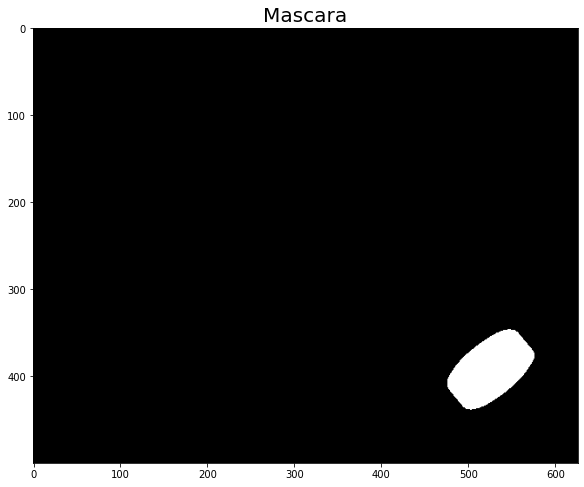

In [547]:
gray_image = cv2.cvtColor(disco3,cv2.COLOR_BGR2GRAY)

T,saida = cv2.threshold(gray_image,0,255,cv2.THRESH_BINARY)

fig,ax=plt.subplots(figsize=(17,8))

ax.set_title('Mascara',fontsize=20)
plt.imshow(saida,'gray')
plt.plot()

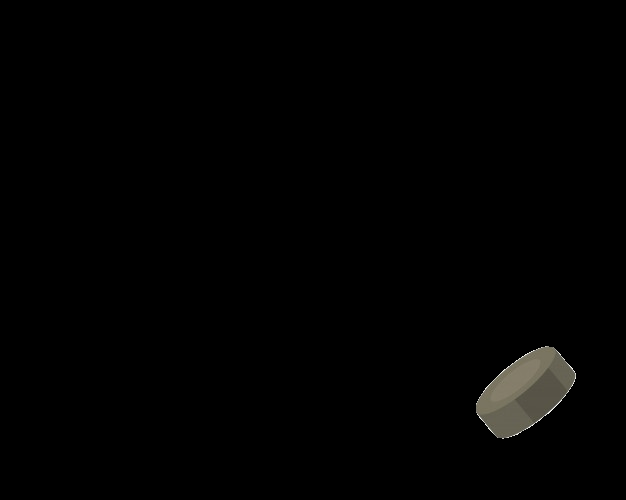

In [548]:
disco_hoquei = cv2.bitwise_and(fun_pre,fun_pre,mask=saida) 
cv2_imshow(disco_hoquei)

### Bola de beisebol

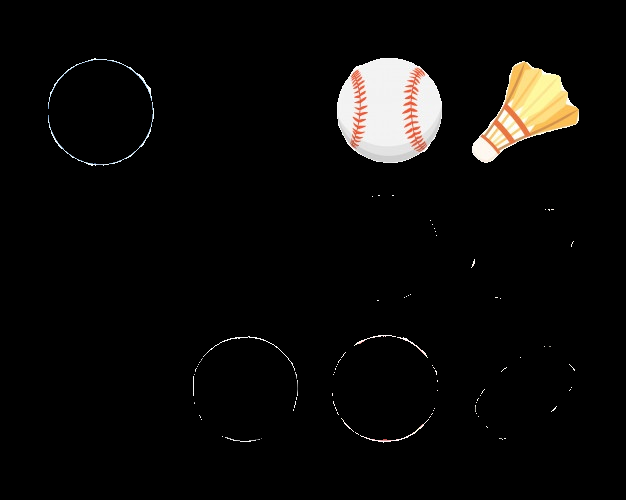

In [580]:
imagem_in = fun_pre - (bola_volei + bola_basquete + bola_famericano + bola_golfe + bola_gude + disco_hoquei + bola_sinuca + bola_tenis + bola_futebol + bola_boliche)
cv2_imshow(imagem_in)

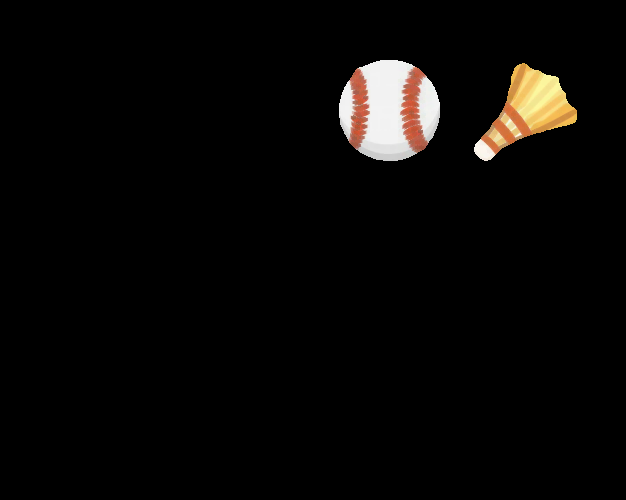

In [581]:
kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
beisebol = cv2.erode(imagem_in,kernel2,iterations=1)
cv2_imshow(beisebol)

[]

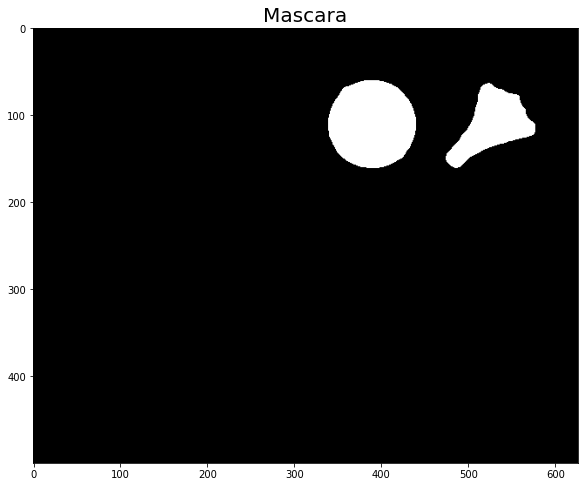

In [582]:
gray_image = cv2.cvtColor(beisebol,cv2.COLOR_BGR2GRAY)

T,saida = cv2.threshold(gray_image,0,255,cv2.THRESH_BINARY)

fig,ax=plt.subplots(figsize=(17,8))

ax.set_title('Mascara',fontsize=20)
plt.imshow(saida,'gray')
plt.plot()

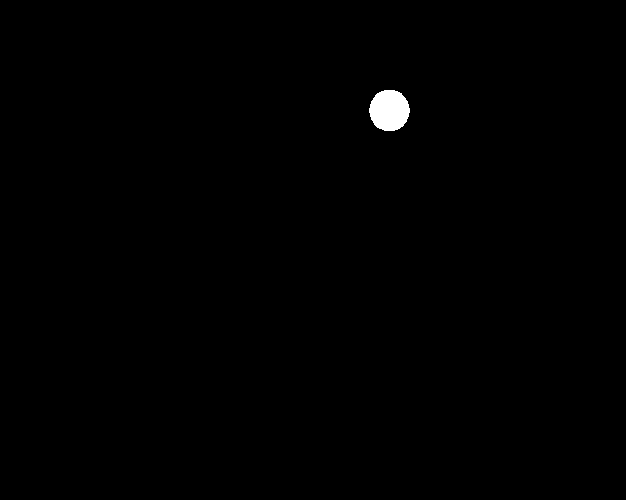

In [583]:
kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(61,61))
beisebol1 = cv2.erode(saida,kernel2,iterations=1)
cv2_imshow(beisebol1)

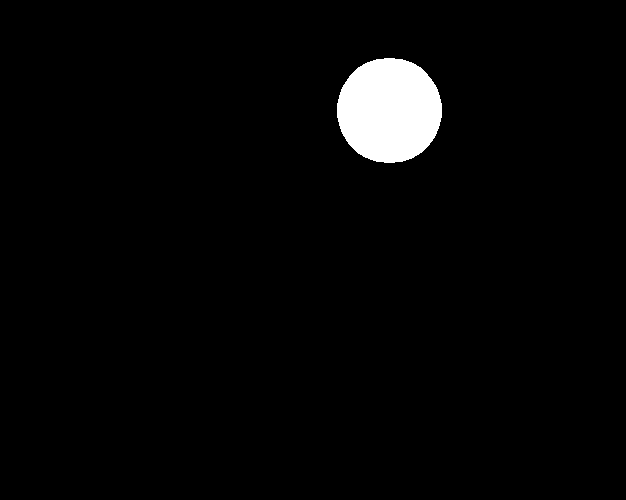

In [584]:
kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(65,65))
beisebol2 = cv2.dilate(beisebol1,kernel2,iterations=1)
cv2_imshow(beisebol2)

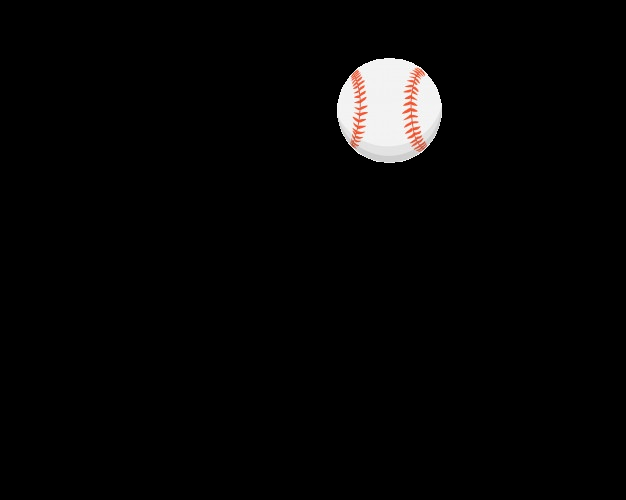

In [585]:
bola_beisebol = cv2.bitwise_and(fun_pre,fun_pre,mask=beisebol2)
cv2_imshow(bola_beisebol)

### Peteca 

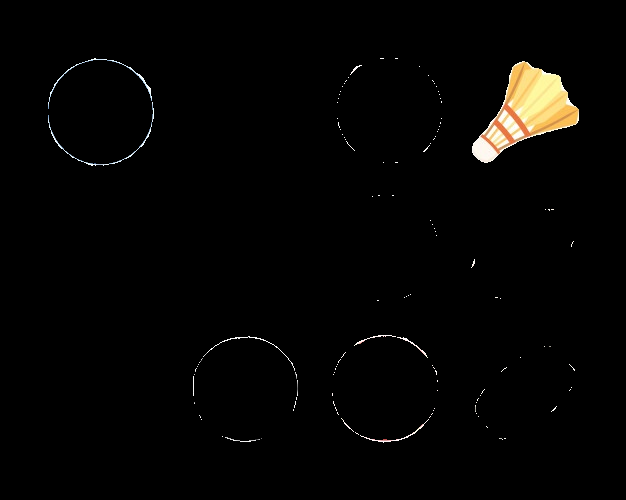

In [586]:
peteca = imagem_in - bola_beisebol
cv2_imshow(peteca)

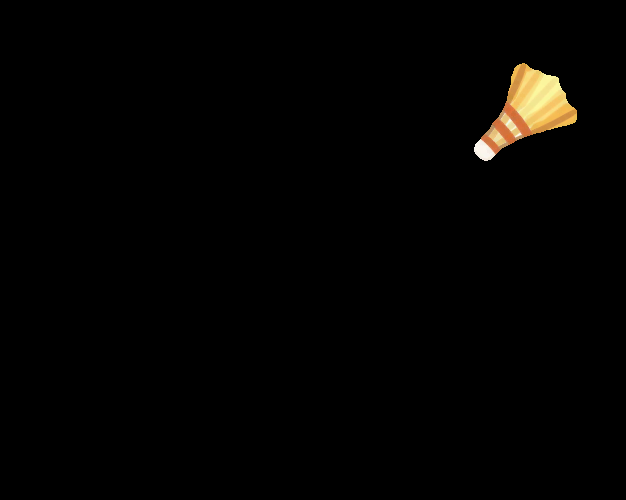

In [587]:
kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
peteca2= cv2.erode(peteca,kernel2,iterations=1)
cv2_imshow(peteca2)

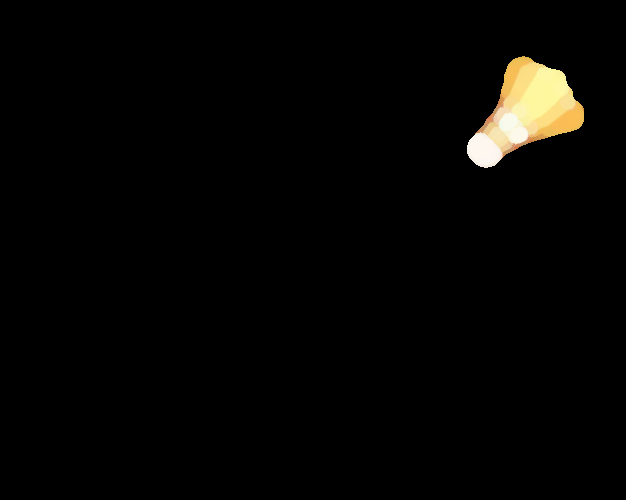

In [588]:
kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(15,15))
peteca3 = cv2.dilate(peteca2,kernel2,iterations=1)
cv2_imshow(peteca3)

[]

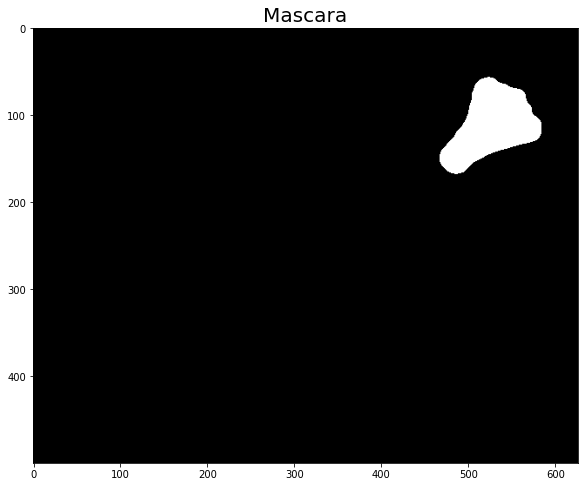

In [589]:
gray_image = cv2.cvtColor(peteca3,cv2.COLOR_BGR2GRAY)

T,saida = cv2.threshold(gray_image,0,255,cv2.THRESH_BINARY)

fig,ax=plt.subplots(figsize=(17,8))

ax.set_title('Mascara',fontsize=20)
plt.imshow(saida,'gray')
plt.plot()

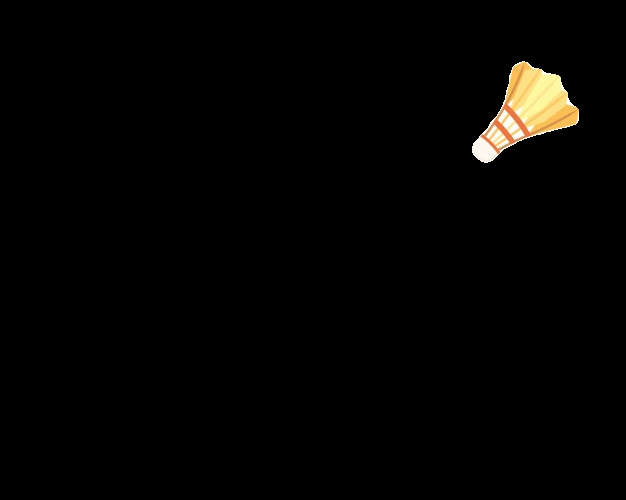

In [590]:
peteca_final = cv2.bitwise_and(fun_pre,fun_pre,mask=saida)
cv2_imshow(peteca_final)

# Imagem 2

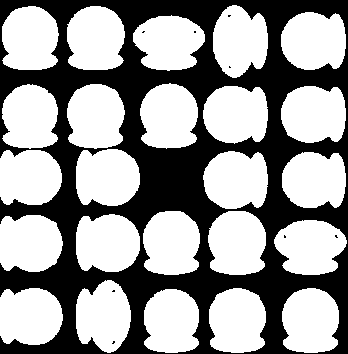

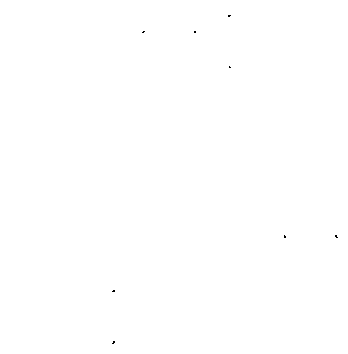

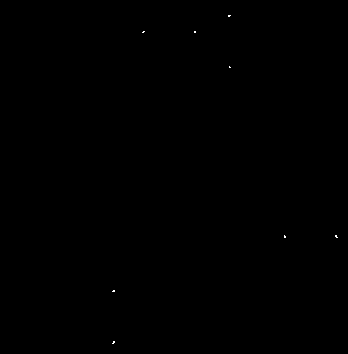

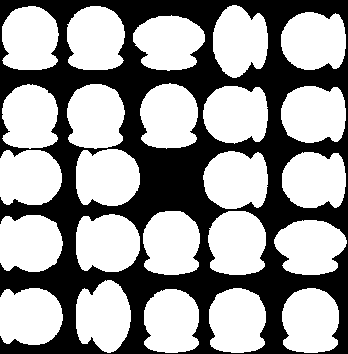

-1

In [601]:
import cv2
from google.colab.patches import cv2_imshow 
import numpy as np
 
# Read image
img2 = cv2.imread("imagem2.png")

gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
 
# Threshold.
# Set values equal to or above 220 to 0.
# Set values below 220 to 255.
 
th, im_th = cv2.threshold(gray,250, 255, cv2.THRESH_BINARY_INV);
 
# Copy the thresholded image.
im_floodfill = im_th.copy()
 
# Mask used to flood filling.
# Notice the size needs to be 2 pixels than the image.
h, w = im_th.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)
 
# Floodfill from point (0, 0)
cv2.floodFill(im_floodfill, mask, (0,0), 255);
 
# Invert floodfilled image
im_floodfill_inv = cv2.bitwise_not(im_floodfill)
 
# Combine the two images to get the foreground.
im_out = im_th | im_floodfill_inv
 
# Display images.
cv2_imshow( im_th)
cv2_imshow( im_floodfill)
cv2_imshow(im_floodfill_inv)
cv2_imshow(im_out)
cv2.waitKey(0)

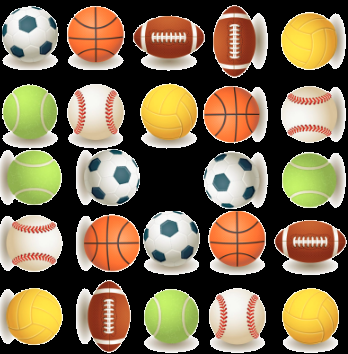

In [602]:
fun_pre2 = cv2.bitwise_and(img2,img2,mask=im_out)
cv2_imshow(fun_pre2) 

## Bola futebol americano

In [603]:
hsv= np.uint8([[[28,52,142]]]) #cores em BGR
hsv_azul = cv2.cvtColor(hsv,cv2.COLOR_BGR2HSV)
print(hsv)

[[[ 28  52 142]]]


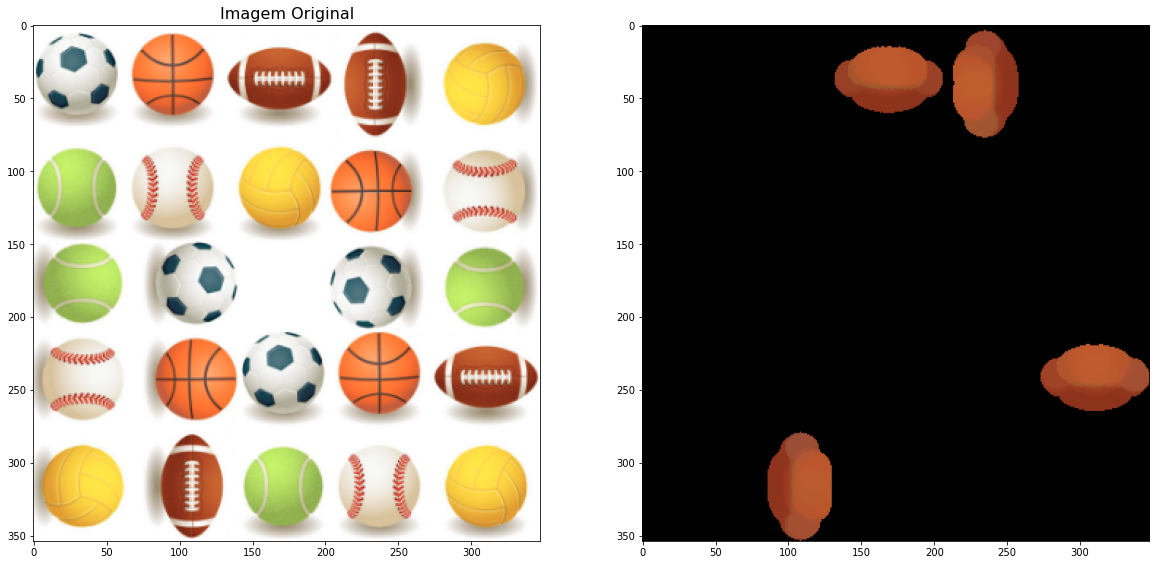

In [604]:
hsv = cv2.cvtColor(img2, cv2.COLOR_BGR2HSV)

upper = np.array([11 ,255,200])
lower = np.array([1,10,10])

mask6= cv2.inRange(hsv, lower, upper)
masc = cv2.bitwise_and(img2,img2,mask=mask6)
imagge = cv2.cvtColor(masc, cv2.COLOR_BGR2RGB)
 
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(9,9))
DILAS = cv2.dilate(imagge,kernel,iterations=1)

kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(25,25))
erode = cv2.erode(DILAS,kernel2,iterations=1)

kernel3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(21,21))
DILAS2 = cv2.dilate(erode,kernel3,iterations=1)

fig, ax = plt.subplots(1,2 , figsize=(20,12)) 

ax[0].set_title('Imagem Original', fontsize=16)
ax[0].imshow(imagem_BGR2)
ax[1].imshow(DILAS2)
plt.show()


[]

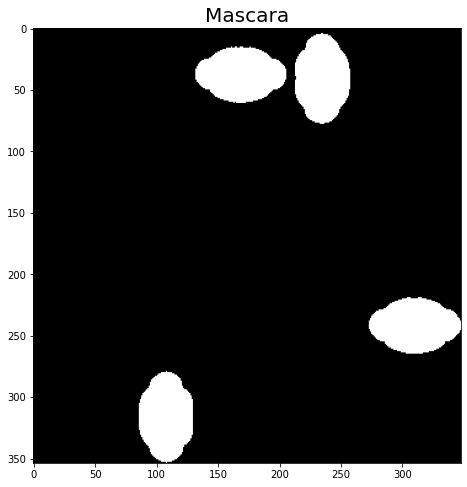

In [605]:
gray_image1 = cv2.cvtColor(DILAS2, cv2.COLOR_BGR2GRAY)

th, saida = cv2.threshold(gray_image1, 0, 255, cv2.THRESH_BINARY);

fig,ax = plt.subplots(figsize=(17,8))

ax.set_title('Mascara', fontsize=20)
plt.imshow(saida,'gray')
plt.plot()


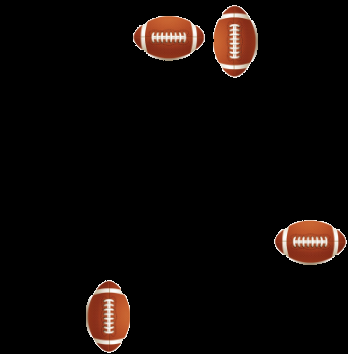

In [606]:
futebolAmericano = cv2.bitwise_and(fun_pre2,fun_pre2,mask=saida)
cv2_imshow(futebolAmericano)

## Bola de vôlei 

In [607]:
hsv = np.uint8([[[28,52,142]]]) #cores em BGR
hsv = cv2.cvtColor(hsv,cv2.COLOR_BGR2HSV)
print(hsv)

[[[  6 205 142]]]


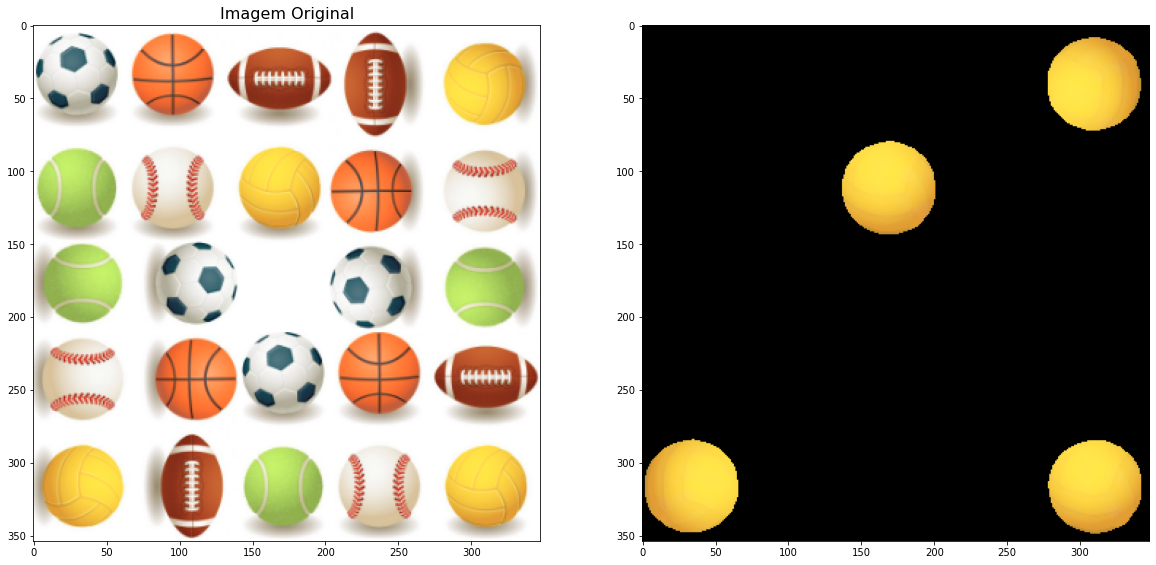

In [633]:
hsv = cv2.cvtColor(img2, cv2.COLOR_BGR2HSV)

upper = np.array([37,255,255])
lower = np.array([16,100,100])

mask6= cv2.inRange(hsv, lower, upper)
masc = cv2.bitwise_and(img2,img2,mask=mask6)
imagem1 = cv2.cvtColor(masc, cv2.COLOR_BGR2RGB)

kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
erode = cv2.erode(imagem1,kernel2,iterations=1)

kernel3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11))
dila = cv2.dilate(erode,kernel3,iterations=1)
 
fig, ax = plt.subplots(1,2 , figsize=(20,12)) 

ax[0].set_title('Imagem Original', fontsize=16)
ax[0].imshow(imagem_BGR2)
ax[1].imshow(dila)
plt.show()


[]

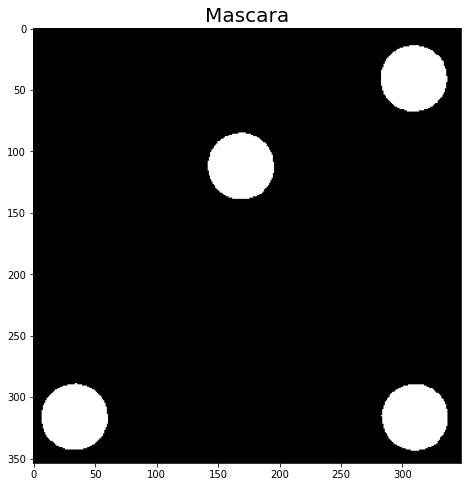

In [634]:
gray_image1 = cv2.cvtColor(erode, cv2.COLOR_BGR2GRAY)

th, saida = cv2.threshold(gray_image1, 0, 255, cv2.THRESH_BINARY);

fig,ax = plt.subplots(figsize=(17,8))

ax.set_title('Mascara', fontsize=20)
plt.imshow(saida,'gray')
plt.plot()


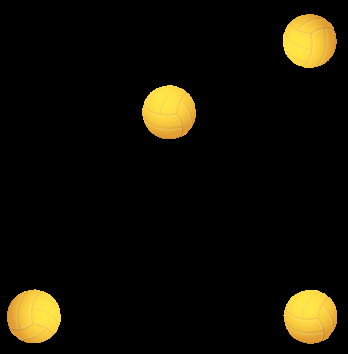

In [635]:
volei_bola = cv2.bitwise_and(fun_pre2,fun_pre2,mask=saida)
cv2_imshow(volei_bola)

## Bola de basquete

In [611]:
hsv = np.uint8([[[28,52,142]]]) #cores em BGR
hsv = cv2.cvtColor(hsv,cv2.COLOR_BGR2HSV)
print(hsv)

[[[  6 205 142]]]


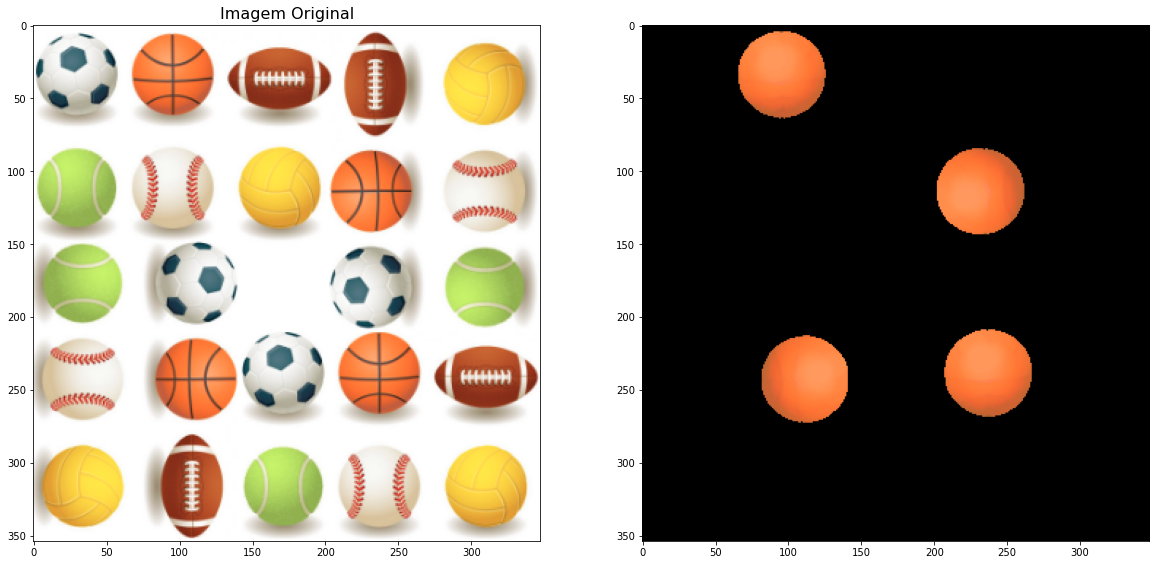

In [612]:
hsv = cv2.cvtColor(img2, cv2.COLOR_BGR2HSV)

upper = np.array([29,225,255])
lower = np.array([0,100,100])

mask6= cv2.inRange(hsv, lower, upper)
masc = cv2.bitwise_and(img2,img2,mask=mask6)
imagem1 = cv2.cvtColor(masc, cv2.COLOR_BGR2RGB)

imgBGR = cv2.cvtColor(futebolAmericano,cv2.COLOR_BGR2RGB)
imgBGR2 = cv2.cvtColor(volei_bola,cv2.COLOR_BGR2RGB)

imagem2 = imagem1 - (imgBGR + imgBGR2)

kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7))
dilate = cv2.dilate(imagem2,kernel1,iterations=1)

kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(17,17))
erode = cv2.erode(dilate,kernel2,iterations=1)

kernel3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(15,15))
dilate2 = cv2.dilate(erode,kernel3,iterations=1)

fig, ax = plt.subplots(1,2 , figsize=(20,12)) 

ax[0].set_title('Imagem Original', fontsize=16)
ax[0].imshow(imagem_BGR2)
ax[1].imshow(dilate2)
plt.show()

[]

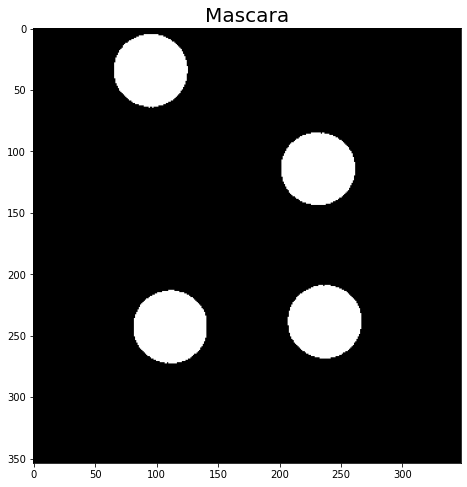

In [613]:
gray_image1 = cv2.cvtColor(dilate2, cv2.COLOR_BGR2GRAY)

th, saida = cv2.threshold(gray_image1, 0, 255, cv2.THRESH_BINARY);

fig,ax = plt.subplots(figsize=(17,8))

ax.set_title('Mascara', fontsize=20)
plt.imshow(saida,'gray')
plt.plot()


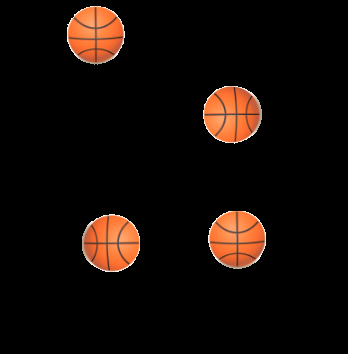

In [614]:
basquete_bola = cv2.bitwise_and(fun_pre2,fun_pre2,mask=saida)
cv2_imshow(basquete_bola)

## Bola de tenis

In [615]:
hsv = np.uint8([[[28,52,142]]]) #cores em BGR
hsv = cv2.cvtColor(hsv,cv2.COLOR_BGR2HSV)
print(hsv)

[[[  6 205 142]]]


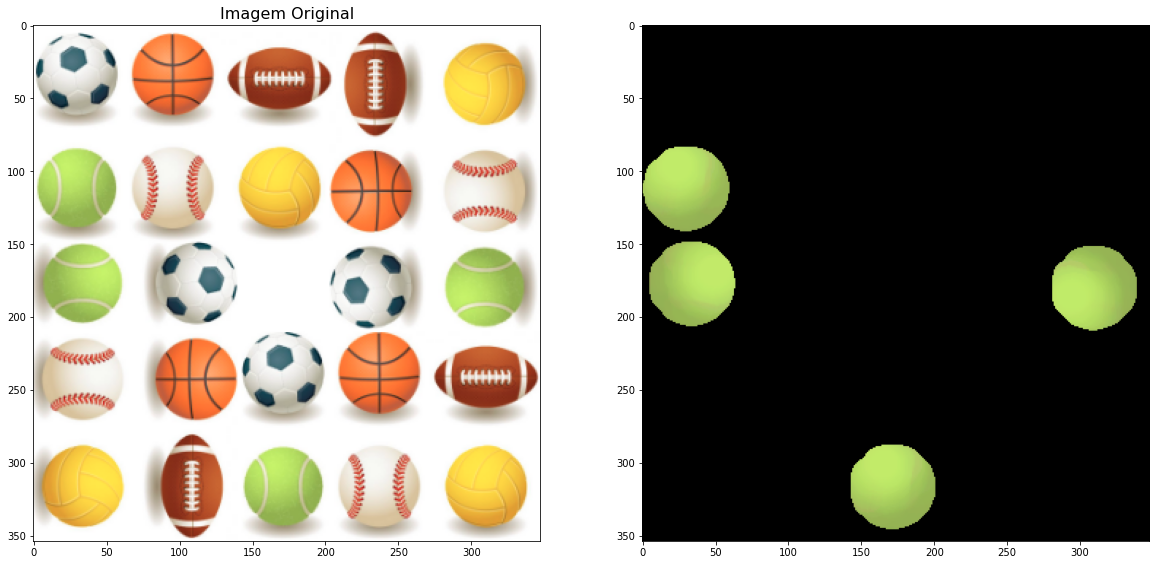

In [616]:
hsv = cv2.cvtColor(img2, cv2.COLOR_BGR2HSV)

upper = np.array([79,150,255])
lower = np.array([0,100,100])

mask6= cv2.inRange(hsv, lower, upper)
masc = cv2.bitwise_and(img2,img2,mask=mask6)
imagem1 = cv2.cvtColor(masc, cv2.COLOR_BGR2RGB)


kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(8,8))
dilata = cv2.dilate(imagem1, kernel1 ,iterations=1)

kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(23,23))
erode = cv2.erode(dilata, kernel2 ,iterations=1)


kernel3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(21,21))
dilata1 = cv2.dilate(erode, kernel3 ,iterations=1)

fig, ax = plt.subplots(1,2 , figsize=(20,12)) 

ax[0].set_title('Imagem Original', fontsize=16)
ax[0].imshow(imagem_BGR2)
ax[1].imshow(dilata1)
plt.show()

[]

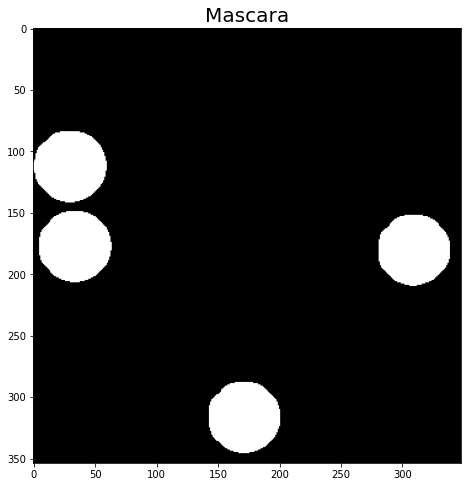

In [617]:
gray_image1 = cv2.cvtColor(dilata1, cv2.COLOR_BGR2GRAY)

th, saida = cv2.threshold(gray_image1, 0, 255, cv2.THRESH_BINARY);

fig,ax = plt.subplots(figsize=(17,8))

ax.set_title('Mascara', fontsize=20)
plt.imshow(saida,'gray')
plt.plot()

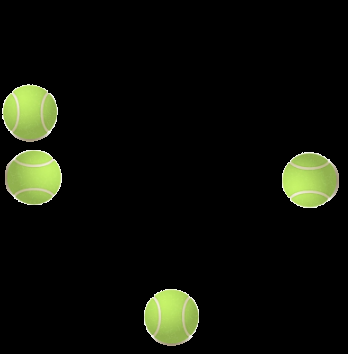

In [618]:
tenis_bola = cv2.bitwise_and(fun_pre2,fun_pre2,mask=saida)
cv2_imshow(tenis_bola)

## Bola de beisebol

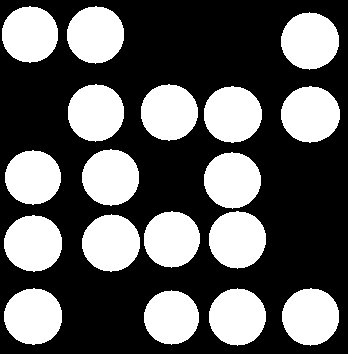

In [619]:
kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(55,55))
erode = cv2.erode(im_out,kernel1,iterations=1)

kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(55,55))
dilata = cv2.dilate(erode,kernel2,iterations=1)

cv2_imshow(dilata)

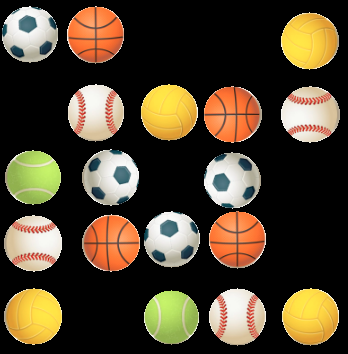

In [620]:
imagem_png = cv2.bitwise_and(img2,img2,mask=dilata)
cv2_imshow(imagem_png)

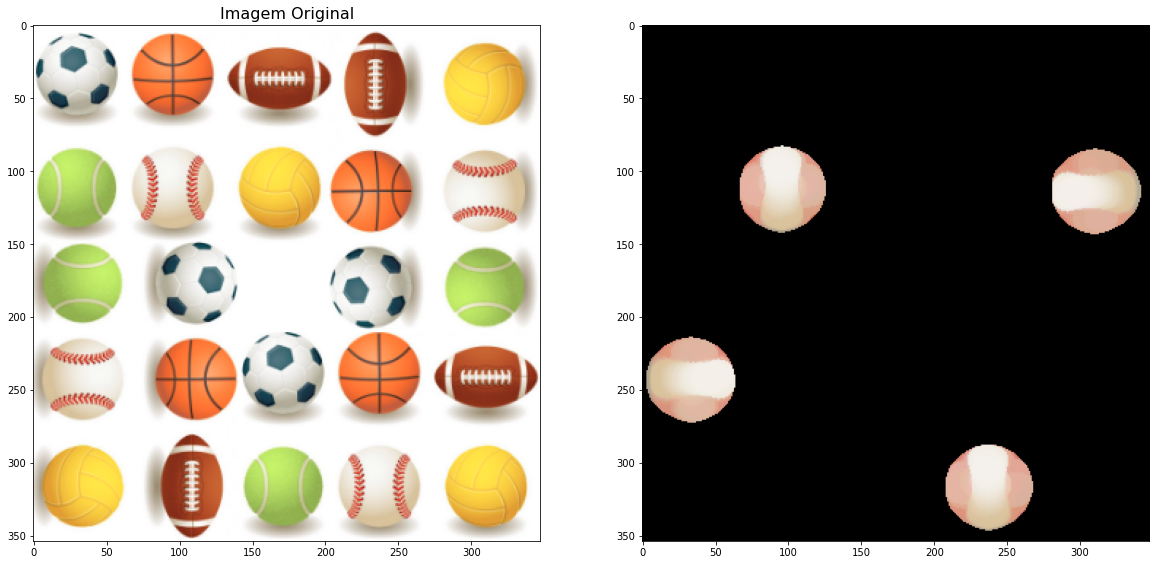

In [621]:
hsv = cv2.cvtColor(imagem_png, cv2.COLOR_BGR2HSV)

upper = np.array([37,255,255])
lower = np.array([0,5,5])

mask6= cv2.inRange(hsv, lower, upper)
masc = cv2.bitwise_and(img2,img2,mask=mask6)
imagem1 = cv2.cvtColor(masc, cv2.COLOR_BGR2RGB)

bgr1 = cv2.cvtColor(basquete_bola, cv2.COLOR_BGR2RGB)
bgr3 = cv2.cvtColor(volei_bola, cv2.COLOR_BGR2RGB)

imagem2 = imagem1 - (bgr1  + bgr3)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
dilata = cv2.dilate(imagem2,kernel,iterations=1)
 
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(22,22))
erode = cv2.erode(dilata,kernel,iterations=1)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(21,21))
dilata2 = cv2.dilate(erode,kernel,iterations=1)

fig, ax = plt.subplots(1,2 , figsize=(20,12)) 

ax[0].set_title('Imagem Original', fontsize=16)
ax[0].imshow(imagem_BGR2)
ax[1].imshow(dilata2)
plt.show()

[]

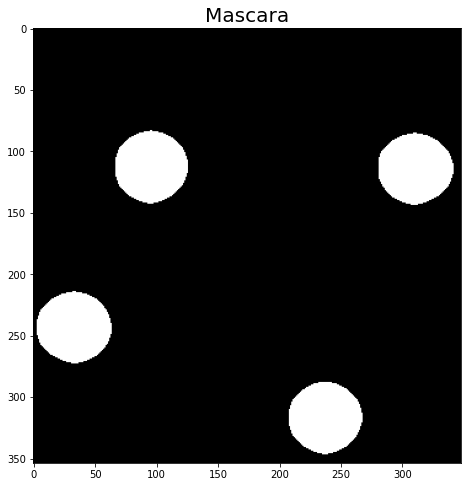

In [622]:
gray_image1 = cv2.cvtColor(dilata2, cv2.COLOR_BGR2GRAY)

th, saida = cv2.threshold(gray_image1, 0, 255, cv2.THRESH_BINARY);

fig,ax = plt.subplots(figsize=(17,8))

ax.set_title('Mascara', fontsize=20)
plt.imshow(saida,'gray')
plt.plot()

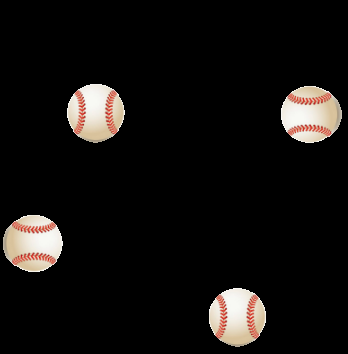

In [623]:
beisebol_bola = cv2.bitwise_and(fun_pre2,fun_pre2,mask=saida)
cv2_imshow(beisebol_bola)

## Bola de futebol

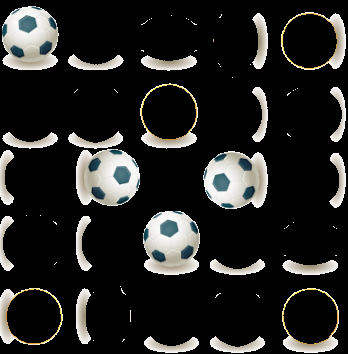

In [624]:
imagem_final = fun_pre2 - (futebolAmericano + basquete_bola + volei_bola + tenis_bola + beisebol_bola) 
cv2_imshow(imagem_final)

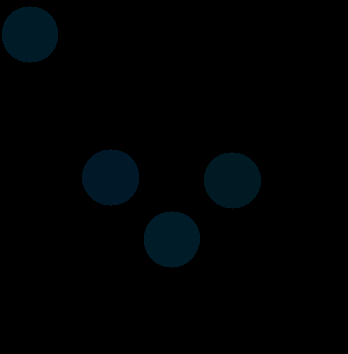

In [625]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(55,55))
erode = cv2.erode(imagem_final,kernel,iterations=1)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(55,55))
dilataf = cv2.dilate(erode,kernel,iterations=1)
cv2_imshow(dilataf)

[]

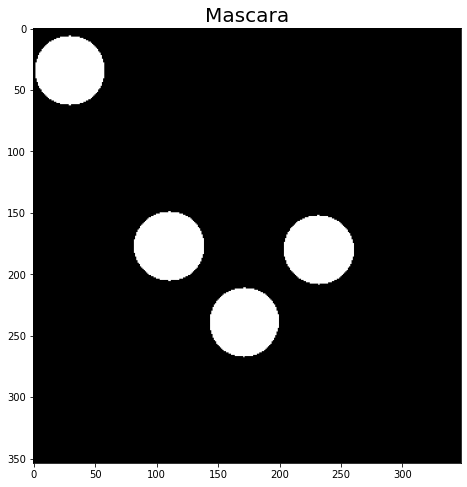

In [626]:
gray_image1 = cv2.cvtColor(dilataf, cv2.COLOR_BGR2GRAY)

th, saida = cv2.threshold(gray_image1, 0, 255, cv2.THRESH_BINARY);

fig,ax = plt.subplots(figsize=(17,8))

ax.set_title('Mascara', fontsize=20)
plt.imshow(saida,'gray')
plt.plot()

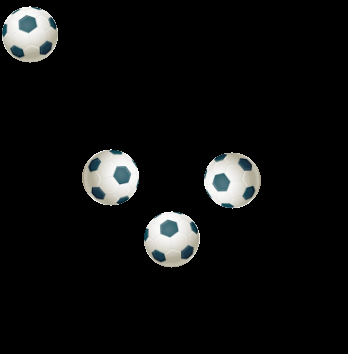

In [627]:
futebol_bola = cv2.bitwise_and(fun_pre2,fun_pre2,mask=saida)
cv2_imshow(futebol_bola)